[<img src="images/front_page.jpeg" target="_blank" alt="Click to go to this project's GitHub repository" title="Click to go to this project's GitHub repository"/>](https://github.com/AAZG/Clustering-of-Customer-Personality-Analysis)

# Clustering of Customer Personality Analysis

## About The Dataset :-

### Context
#### Problem Statement

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

<p>
  Enlace to  <a
    href="https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis"
    title="The best place to find dataset and learn data science"
    >Dataset in Kaggle</a
  >.
</p>

[<img src="images/picture1.jpg" target="_blank" alt="Click to go to dataset in Kaggle" title="Click to go to dataset in Kaggle"/>](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis)

## Content
### Attributes
#### People

1. ID: Customer's unique identifier.
2. Year_Birth: Customer's birth year.
3. Education: Customer's education level.
4. Marital_Status: Customer's marital status.
5. Income: Customer's yearly household income.
6. Kidhome: Number of children in customer's household.
7. Teenhome: Number of teenagers in customer's household.
8. Dt_Customer: Date of customer's enrollment with the company.
9. Recency: Number of days since customer's last purchase.
10. Complain: 1 if customer complained in the last 2 years, 0 otherwise.

#### Products

1. MntWines: Amount spent on wine in last 2 years.
2. MntFruits: Amount spent on fruits in last 2 years.
3. MntMeatProducts: Amount spent on meat in last 2 years.
4. MntFishProducts: Amount spent on fish in last 2 years.
5. MntSweetProducts: Amount spent on sweets in last 2 years.
6. MntGoldProds: Amount spent on gold in last 2 years.

#### Promotion

1. NumDealsPurchases: Number of purchases made with a discount.
2. AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise.
3. AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise.
4. AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise.
5. AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise.
6. AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise.
7. Response: 1 if customer accepted the offer in the last campaign, 0 otherwise.
8. Z_CostContact: *
9. Z_Revenue: *

#### Place

1. NumWebPurchases: Number of purchases made through the company’s web site.
2. NumCatalogPurchases: Number of purchases made using a catalogue.
3. NumStorePurchases: Number of purchases made directly in stores.
4. NumWebVisitsMonth: Number of visits to company’s web site in the last month.


><div style="background-color: #F6FFF6;"> 
><div style="font-weight: bold;font-size:18px">Observations</div>
><ul style="font-size:16px;">
>
>In the Attributes:
<br>- "Z_CostContact" and "Z_Revenue" have same value in all the rows that's why , they are not going to contribute anything in the model building. So we can drop them later.
></ul>
></div>


## Target
Need to perform clustering to summarize customer segments.

## Importar librerías

In [1]:
!python -m pip install -q --upgrade pip
!pip install -q -r requirements.txt

In [2]:
# Miscellaneous
from __future__ import print_function

#Importing Requierd Libraries
import pandas as pd
import numpy as np
from itertools import product

# For interactive graphics
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from yellowbrick.cluster import KElbowVisualizer
from ydata_profiling import ProfileReport

# Sklearn
from sklearn.preprocessing import StandardScaler
import sklearn.impute
import sklearn.compose
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation, MeanShift, SpectralClustering, estimate_bandwidth
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.neighbors import NearestNeighbors

# Magics Funtions
%load_ext autoreload
%autoreload 2
%run "template_visualitation.ipynb"
%run "pandas-missing-extension.ipynb"

# Install libraries with pip
# !pip install pyarrow
# !pip install pandarallel
# !pip install PivotTableJS

## Load of data

In [3]:
%%time

df_campaign = pd.read_csv('marketing_campaign.csv', sep='\t')

CPU times: user 5.07 ms, sys: 2.95 ms, total: 8.02 ms
Wall time: 10.1 ms


### Convert to Feather to reduce load + save of DataFrame

In [4]:
df_campaign.to_feather("marketing_campaign.feather")

In [5]:
%%time

df_campaign = pd.read_feather("marketing_campaign.feather")

CPU times: user 0 ns, sys: 5.58 ms, total: 5.58 ms
Wall time: 4.34 ms


In [6]:
df_campaign.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

In [7]:
df_campaign.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

><div style="background-color: #F6FFF6;"> 
><div style="font-weight: bold;font-size:18px">Observations</div>
><ul style="font-size:16px;">
>
>At first glance at the data:
<br>- There are 2240 entries and 29 columns, one column is a customer id;
<br>- Columns 'z_costcontact', 'z_revenue' have zero std. All the values are the same, we will remove these columns from the df later after a review.
<br>- There are no duplicate values or errors (at first glance), only missing values in the "Income" column, which we will review and impute;
<br>- There are some columns, whose data types should be changed, eg 'object' to 'datetime' and apply OrdinalEncoder to avoid problems with our clustering algorithms later.<br>
<br>- There are some columns, whose data types can be changed to optimize resources, you must also transform some columns, for example from 'object' to 'datetime' and apply OrdinalEncoder to avoid problems with our clustering algorithms later.<br >
In the next step, we'll study and preprocess outliers, rename columns, and change data types.
></ul>
></div>

### Memory Reduction to DataFrame

In [8]:
memory_usage = df_campaign.memory_usage(deep=True) / 1024 ** 2
print(f'memory usage of features:\n{memory_usage.head(7)}')
print('memory usage sum:',memory_usage.sum())

memory usage of features:
Index             0.000122
ID                0.017090
Year_Birth        0.017090
Education         0.137827
Marital_Status    0.136875
Income            0.017090
Kidhome           0.017090
dtype: float64
memory usage sum: 0.8622875213623047


><div style="background-color: #F6FFF6;"> 
><div style="font-weight: bold;font-size:18px">Observations</div>
><ul style="font-size:16px;">
>
>In our examined column:
<br>- Although we have already optimized the loading time of the dataset quite a lot using the .feather format, we can also optimize the size in memory with a small python script. We will apply this function to our dataset every time we apply some format or transformation that changes its size.
></ul>
></div>

In [9]:
def reduce_memory_usage(df, verbose=True):
    numerics = ["int8", "int16", "int32", "int64", "float16", "float32", "float64"]
    start_mem = df.memory_usage().sum() / 1024 ** 2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == "int":
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if (
                    c_min > np.finfo(np.float16).min
                    and c_max < np.finfo(np.float16).max
                ):
                    df[col] = df[col].astype(np.float16)
                elif (
                    c_min > np.finfo(np.float32).min
                    and c_max < np.finfo(np.float32).max
                ):
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024 ** 2
    if verbose:
        print(
            "Mem. usage decreased to {:.2f} Mb ({:.1f}% reduction)".format(
                end_mem, 100 * (start_mem - end_mem) / start_mem
            )
        )
    return df

df_campaign = reduce_memory_usage(df_campaign, verbose=True)

Mem. usage decreased to 0.13 Mb (73.7% reduction)


In [10]:
df_campaign.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int16  
 1   Year_Birth           2240 non-null   int16  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float32
 5   Kidhome              2240 non-null   int8   
 6   Teenhome             2240 non-null   int8   
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int8   
 9   MntWines             2240 non-null   int16  
 10  MntFruits            2240 non-null   int16  
 11  MntMeatProducts      2240 non-null   int16  
 12  MntFishProducts      2240 non-null   int16  
 13  MntSweetProducts     2240 non-null   int16  
 14  MntGoldProds         2240 non-null   int16  
 15  NumDealsPurchases    2240 non-null   i

## Data cleaning and manipulation

### Transformation and preprocessing of categorical data

In [11]:
df_campaign_transformed = df_campaign.copy(deep=True)
print(df_campaign_transformed['Education'].value_counts(), '\n')
print(df_campaign_transformed['Marital_Status'].value_counts())

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64 

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64


><div style="background-color: #F6FFF6;"> 
><div style="font-weight: bold;font-size:18px">Observations</div>
><ul style="font-size:16px;">
>
>In our examined columns:
<br>- We don't need so many variables, with 'Under Graduate' and 'Post Graduate' they will be useful for our cases in the 'Education' column
<br>- We don't need so many variables, with 'Relationship' and 'Single' they will be useful for our cases in the 'Marital_Status' column
In the next step, we will replace.
></ul>
></div>

In [12]:
df_campaign_transformed['Education'] = df_campaign_transformed['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'Post Graduate')  
df_campaign_transformed['Education'] = df_campaign_transformed['Education'].replace(['Basic'], 'Under Graduate')

In [13]:
df_campaign_transformed['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [14]:
df_campaign_transformed['Marital_Status'] = df_campaign_transformed['Marital_Status'].replace(['Married', 'Together'],'Relationship')
df_campaign_transformed['Marital_Status'] = df_campaign_transformed['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

### Convert categorical variable to datetime

In [15]:
df_campaign_transformed['Dt_Customer'].head(1)

0    04-09-2012
Name: Dt_Customer, dtype: object

><div style="background-color: #F6FFF6;"> 
><div style="font-weight: bold;font-size:18px">Observations</div>
><ul style="font-size:16px;">
>
>In our examined column:
<br>- We can appreciate that 'Dt_Customer' is a time column, we will proceed to transform it into datatime, we will order by this variable and we will place it in the index, to use it in time series if required and so that it does not interfere with our algorithms of clustering.
<br>- In order not to lose the information that it contributes to the dataframe, we will create two additional columns: 'Year_Customer' and 'Month_Customer'
></ul>
></div>

In [16]:
df_campaign_transformed['Dt_Customer'] = pd.to_datetime(df_campaign_transformed['Dt_Customer'], dayfirst=True, format='%d/%m/%Y', infer_datetime_format=True)

In [17]:
df_campaign_transformed.sort_values(by='Dt_Customer', inplace=True) 

In [18]:
df_campaign_transformed = df_campaign_transformed.set_index('Dt_Customer')

In [19]:
df_campaign_transformed['Year_Customer'] = df_campaign_transformed.index.year
df_campaign_transformed['Month_Customer'] = df_campaign_transformed.index.month

In [20]:
df_campaign_transformed

ID  Year_Birth      Education Marital_Status   Income  \
Dt_Customer                                                             
2012-07-30    6653        1970  Post Graduate   Relationship  55158.0   
2012-07-31    6181        1950  Post Graduate   Relationship  52203.0   
2012-08-01   10001        1985  Post Graduate   Relationship   7500.0   
2012-08-01    4692        1976  Post Graduate   Relationship   7500.0   
2012-08-01    2611        1959  Post Graduate   Relationship  82576.0   
...            ...         ...            ...            ...      ...   
2014-06-28    8093        1969  Post Graduate   Relationship  79734.0   
2014-06-28    1371        1976  Post Graduate         Single  79941.0   
2014-06-28    6722        1954  Post Graduate   Relationship  70421.0   
2014-06-29    7300        1952  Post Graduate         Single  69142.0   
2014-06-29     453        1956  Post Graduate         Single  35340.0   

             Kidhome  Teenhome  Recency  MntWines  MntFruits  ...  \
Dt_Customer                                                   ...   
2012-07-30         1         1       72       293          0  ...   
2012-07-31         0         0       36       488         21  ...   
2012-08-01         1         0       98         5         17  ...   
2012-08-01         1         0       19         7          0  ...   
2012-08-01         0         0       66      1206         55  ...   
...              ...       ...      ...       ...        ...  ...   
2014-06-28         0         0       72       572          8  ...   
2014-06-28         0         0       72       123        164  ...   
2014-06-28         0         1       98       479         28  ...   
2014-06-29         0         1       50       448          4  ...   
2014-06-29         1         1        1        27          0  ...   

             AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
Dt_Customer                                                                     
2012-07-30              0             0             0             0         0   
2012-07-31              0             0             0             0         0   
2012-08-01              0             0             0             0         0   
2012-08-01              0             0             0             0         0   
2012-08-01              0             1             0             0         0   
...                   ...           ...           ...           ...       ...   
2014-06-28              0             0             1             0         0   
2014-06-28              0             0             0             0         0   
2014-06-28              0             0             0             0         0   
2014-06-29              1             0             0             0         0   
2014-06-29              0             0             0             0         0   

             Z_CostContact  Z_Revenue  Response  Year_Customer  Month_Customer  
Dt_Customer                                                                     
2012-07-30               3         11         1           2012               7  
2012-07-31               3         11         0           2012               7  
2012-08-01               3         11         0           2012               8  
2012-08-01               3         11         1           2012               8  
2012-08-01               3         11         0           2012               8  
...                    ...        ...       ...            ...             ...  
2014-06-28               3         11         0           2014               6  
2014-06-28               3         11         0           2014               6  
2014-06-28               3         11         0           2014               6  
2014-06-29               3         11         0           2014               6  
2014-06-29               3         11         0           2014               6  

[2240 rows x 30 columns]

### Convert categorical variables to numeric

In [21]:
categorical_columns = df_campaign_transformed.select_dtypes(include='object').columns
categorical_columns

Index(['Education', 'Marital_Status'], dtype='object')

><div style="background-color: #F6FFF6;"> 
><div style="font-weight: bold;font-size:18px">Observations</div>
><ul style="font-size:16px;">
>
>In our examined column:
<br>- We will proceed to use OrdinalEncoder(), to transform the two remaining object type columns.
></ul>
></div>

In [22]:
categorical_transformer = sklearn.compose.make_column_transformer(
    (sklearn.preprocessing.OrdinalEncoder(), [categorical_columns[0]]),
    (sklearn.preprocessing.OrdinalEncoder(), [categorical_columns[1]]),
    remainder="passthrough"
)

In [23]:
df_campaign_transformed = (
    pd.DataFrame(
        categorical_transformer.fit_transform(df_campaign_transformed),
        columns = categorical_transformer.get_feature_names_out(),
        index = df_campaign_transformed.index
    )
)

df_campaign_transformed.columns = df_campaign_transformed.columns.str.replace('remainder__', '')
df_campaign_transformed.columns = df_campaign_transformed.columns.str.replace('ordinalencoder-1__', '')
df_campaign_transformed.columns = df_campaign_transformed.columns.str.replace('ordinalencoder-2__', '')

df_campaign_transformed

Education  Marital_Status       ID  Year_Birth   Income  Kidhome  \
Dt_Customer                                                                     
2012-07-30         0.0             0.0   6653.0      1970.0  55158.0      1.0   
2012-07-31         0.0             0.0   6181.0      1950.0  52203.0      0.0   
2012-08-01         0.0             0.0  10001.0      1985.0   7500.0      1.0   
2012-08-01         0.0             0.0   4692.0      1976.0   7500.0      1.0   
2012-08-01         0.0             0.0   2611.0      1959.0  82576.0      0.0   
...                ...             ...      ...         ...      ...      ...   
2014-06-28         0.0             0.0   8093.0      1969.0  79734.0      0.0   
2014-06-28         0.0             1.0   1371.0      1976.0  79941.0      0.0   
2014-06-28         0.0             0.0   6722.0      1954.0  70421.0      0.0   
2014-06-29         0.0             1.0   7300.0      1952.0  69142.0      0.0   
2014-06-29         0.0             1.0    453.0      1956.0  35340.0      1.0   

             Teenhome  Recency  MntWines  MntFruits  ...  AcceptedCmp4  \
Dt_Customer                                          ...                 
2012-07-30        1.0     72.0     293.0        0.0  ...           0.0   
2012-07-31        0.0     36.0     488.0       21.0  ...           0.0   
2012-08-01        0.0     98.0       5.0       17.0  ...           0.0   
2012-08-01        0.0     19.0       7.0        0.0  ...           0.0   
2012-08-01        0.0     66.0    1206.0       55.0  ...           0.0   
...               ...      ...       ...        ...  ...           ...   
2014-06-28        0.0     72.0     572.0        8.0  ...           0.0   
2014-06-28        0.0     72.0     123.0      164.0  ...           0.0   
2014-06-28        1.0     98.0     479.0       28.0  ...           0.0   
2014-06-29        1.0     50.0     448.0        4.0  ...           1.0   
2014-06-29        1.0      1.0      27.0        0.0  ...           0.0   

             AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
Dt_Customer                                                       
2012-07-30            0.0           0.0           0.0       0.0   
2012-07-31            0.0           0.0           0.0       0.0   
2012-08-01            0.0           0.0           0.0       0.0   
2012-08-01            0.0           0.0           0.0       0.0   
2012-08-01            1.0           0.0           0.0       0.0   
...                   ...           ...           ...       ...   
2014-06-28            0.0           1.0           0.0       0.0   
2014-06-28            0.0           0.0           0.0       0.0   
2014-06-28            0.0           0.0           0.0       0.0   
2014-06-29            0.0           0.0           0.0       0.0   
2014-06-29            0.0           0.0           0.0       0.0   

             Z_CostContact  Z_Revenue  Response  Year_Customer  Month_Customer  
Dt_Customer                                                                     
2012-07-30             3.0       11.0       1.0         2012.0             7.0  
2012-07-31             3.0       11.0       0.0         2012.0             7.0  
2012-08-01             3.0       11.0       0.0         2012.0             8.0  
2012-08-01             3.0       11.0       1.0         2012.0             8.0  
2012-08-01             3.0       11.0       0.0         2012.0             8.0  
...                    ...        ...       ...            ...             ...  
2014-06-28             3.0       11.0       0.0         2014.0             6.0  
2014-06-28             3.0       11.0       0.0         2014.0             6.0  
2014-06-28             3.0       11.0       0.0         2014.0             6.0  
2014-06-29             3.0       11.0       0.0         2014.0             6.0  
2014-06-29             3.0       11.0       0.0         2014.0             6.0  

[2240 rows x 30 columns]

In [24]:
print(
    categorical_transformer
    .named_transformers_
    .get("ordinalencoder-2") 
    .categories_
)

[array(['Relationship', 'Single'], dtype=object)]


In [25]:
print(
    categorical_transformer
    .named_transformers_
    .get('ordinalencoder-2')
    .inverse_transform(
        X = [[1], [0]]
    )
)

[['Single']
 ['Relationship']]


### Verification of categorical variables

In [26]:
df_campaign_transformed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2240 entries, 2012-07-30 to 2014-06-29
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   float64
 1   Marital_Status       2240 non-null   float64
 2   ID                   2240 non-null   float64
 3   Year_Birth           2240 non-null   float64
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   float64
 6   Teenhome             2240 non-null   float64
 7   Recency              2240 non-null   float64
 8   MntWines             2240 non-null   float64
 9   MntFruits            2240 non-null   float64
 10  MntMeatProducts      2240 non-null   float64
 11  MntFishProducts      2240 non-null   float64
 12  MntSweetProducts     2240 non-null   float64
 13  MntGoldProds         2240 non-null   float64
 14  NumDealsPurchases    2240 non-null   float64
 15  NumWebPurchases     

### Union of Kidhome and Teenhome variables in a single column

In [27]:
df_campaign_transformed['Kidhome'].value_counts()

0.0    1293
1.0     899
2.0      48
Name: Kidhome, dtype: int64

In [28]:
df_campaign_transformed['Teenhome'].value_counts()

0.0    1158
1.0    1030
2.0      52
Name: Teenhome, dtype: int64

><div style="background-color: #F6FFF6;"> 
><div style="font-weight: bold;font-size:18px">Observations</div>
><ul style="font-size:16px;">
>
>In our examined columns:
<br>- We don't need two columns to represent the presence of children in the household, so we'll merge them into a single variable called 'children'.
></ul>
></div>

In [29]:
df_campaign_transformed['Children'] = df_campaign_transformed['Kidhome'] + df_campaign_transformed['Teenhome']

### Elimination of redundant variables

><div style="background-color: #F6FFF6;"> 
><div style="font-weight: bold;font-size:18px">Observations</div>
><ul style="font-size:16px;">
>
<br>- Next, we will eliminate some of the columns of variables that are contained in other variables or that do not contribute information. These columns include the ID, Teenhome, and Kidhome.
></ul>
></div>

In [30]:
df_campaign_transformed=df_campaign_transformed.drop(columns=["Kidhome", "Teenhome", 'ID'],axis=1)

### Missing imputation

In [31]:
df_campaign_transformed.missing.missing_variable_summary()

variable  n_missing  n_cases  pct_missing
0             Education          0     2240     0.000000
1        Marital_Status          0     2240     0.000000
2            Year_Birth          0     2240     0.000000
3                Income         24     2240     1.071429
4               Recency          0     2240     0.000000
5              MntWines          0     2240     0.000000
6             MntFruits          0     2240     0.000000
7       MntMeatProducts          0     2240     0.000000
8       MntFishProducts          0     2240     0.000000
9      MntSweetProducts          0     2240     0.000000
10         MntGoldProds          0     2240     0.000000
11    NumDealsPurchases          0     2240     0.000000
12      NumWebPurchases          0     2240     0.000000
13  NumCatalogPurchases          0     2240     0.000000
14    NumStorePurchases          0     2240     0.000000
15    NumWebVisitsMonth          0     2240     0.000000
16         AcceptedCmp3          0     2240     0.000000
17         AcceptedCmp4          0     2240     0.000000
18         AcceptedCmp5          0     2240     0.000000
19         AcceptedCmp1          0     2240     0.000000
20         AcceptedCmp2          0     2240     0.000000
21             Complain          0     2240     0.000000
22        Z_CostContact          0     2240     0.000000
23            Z_Revenue          0     2240     0.000000
24             Response          0     2240     0.000000
25        Year_Customer          0     2240     0.000000
26       Month_Customer          0     2240     0.000000
27             Children          0     2240     0.000000

><div style="background-color: #F6FFF6;"> 
><div style="font-weight: bold;font-size:18px">Observations</div>
><ul style="font-size:16px;">
>
>In our examined columns:
<br>- We will verify that there is no pattern in the missing data in the 'Income' column, and we will proceed to impute using KNN.
<br>- We will visualize the location of the imputed data in a scatter plot.
></ul>
></div>

<AxesSubplot: >

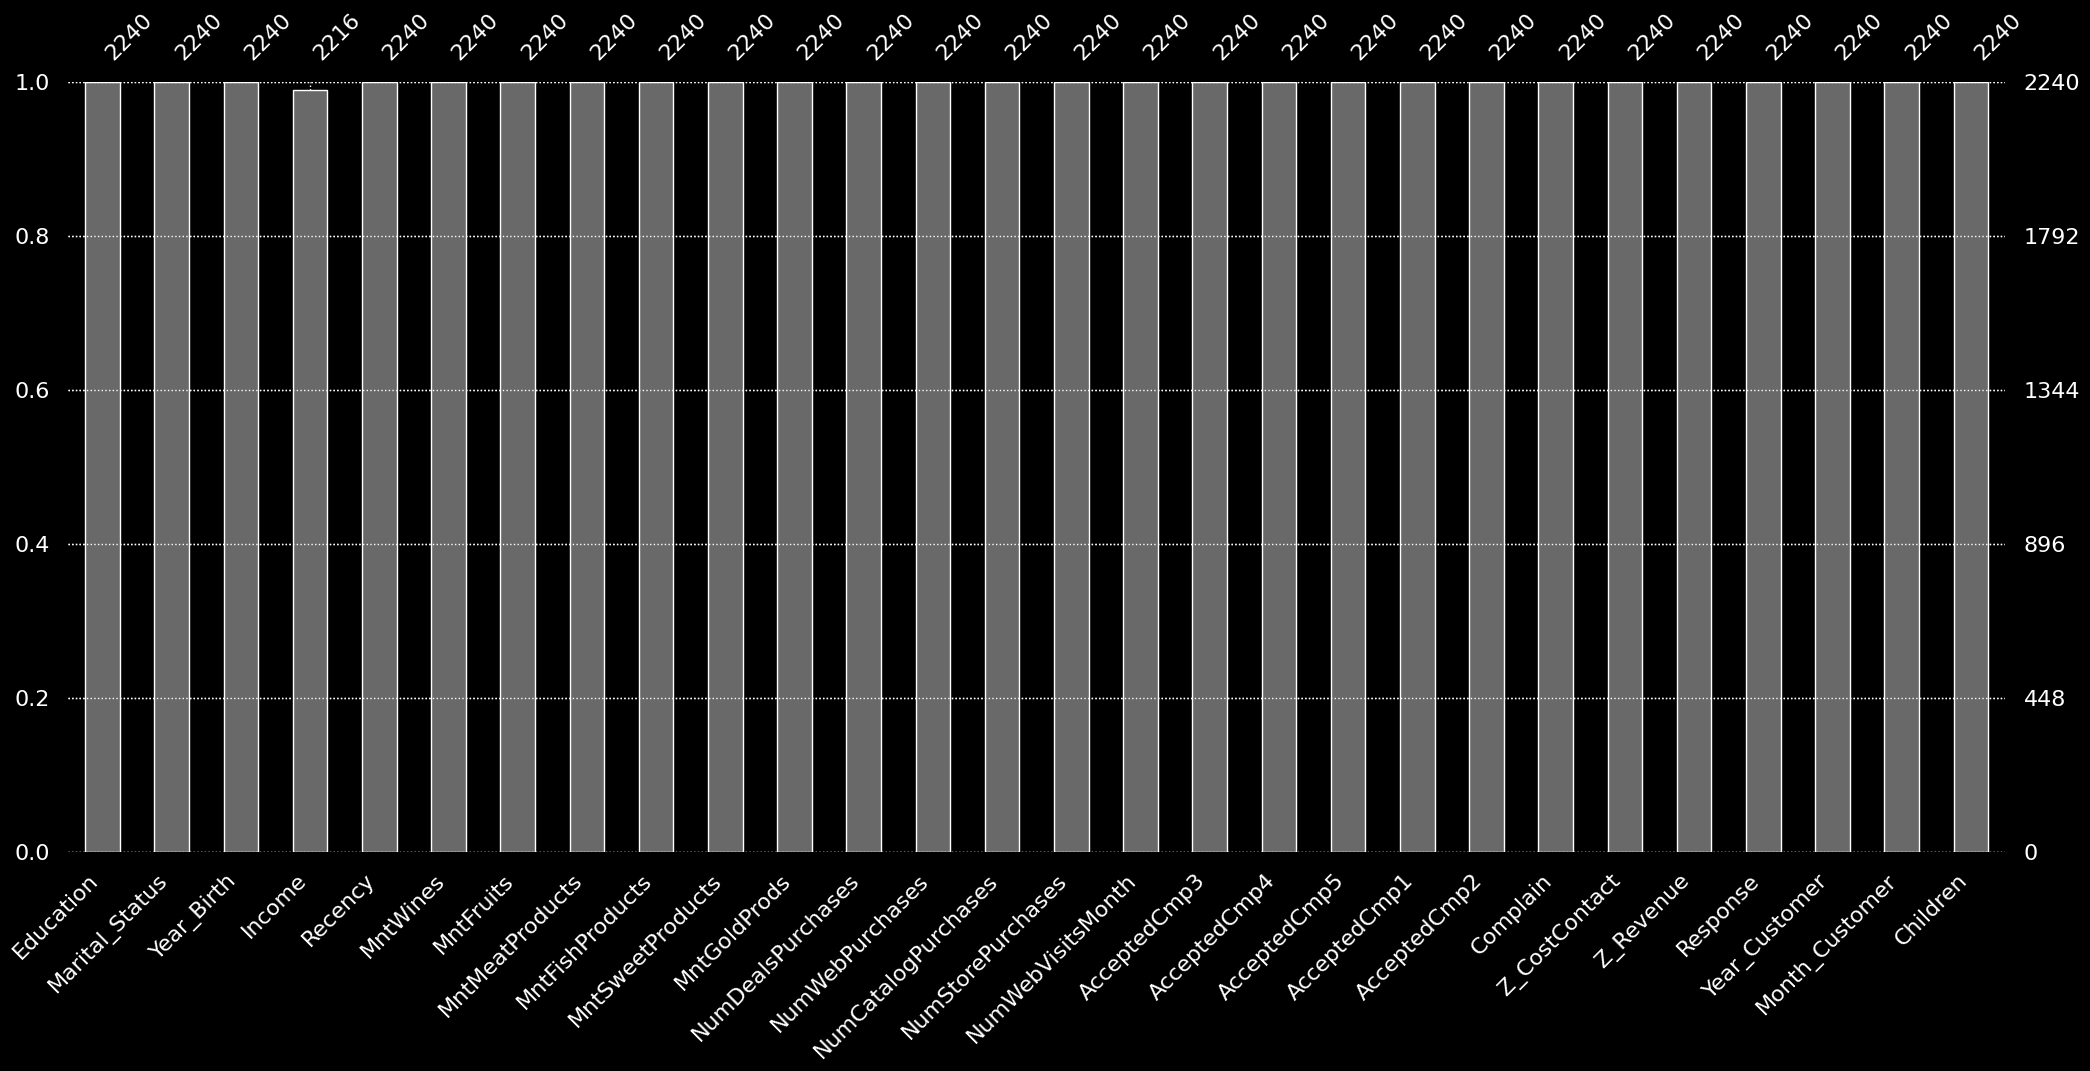

In [32]:
missingno.bar(df=df_campaign_transformed)

<AxesSubplot: >

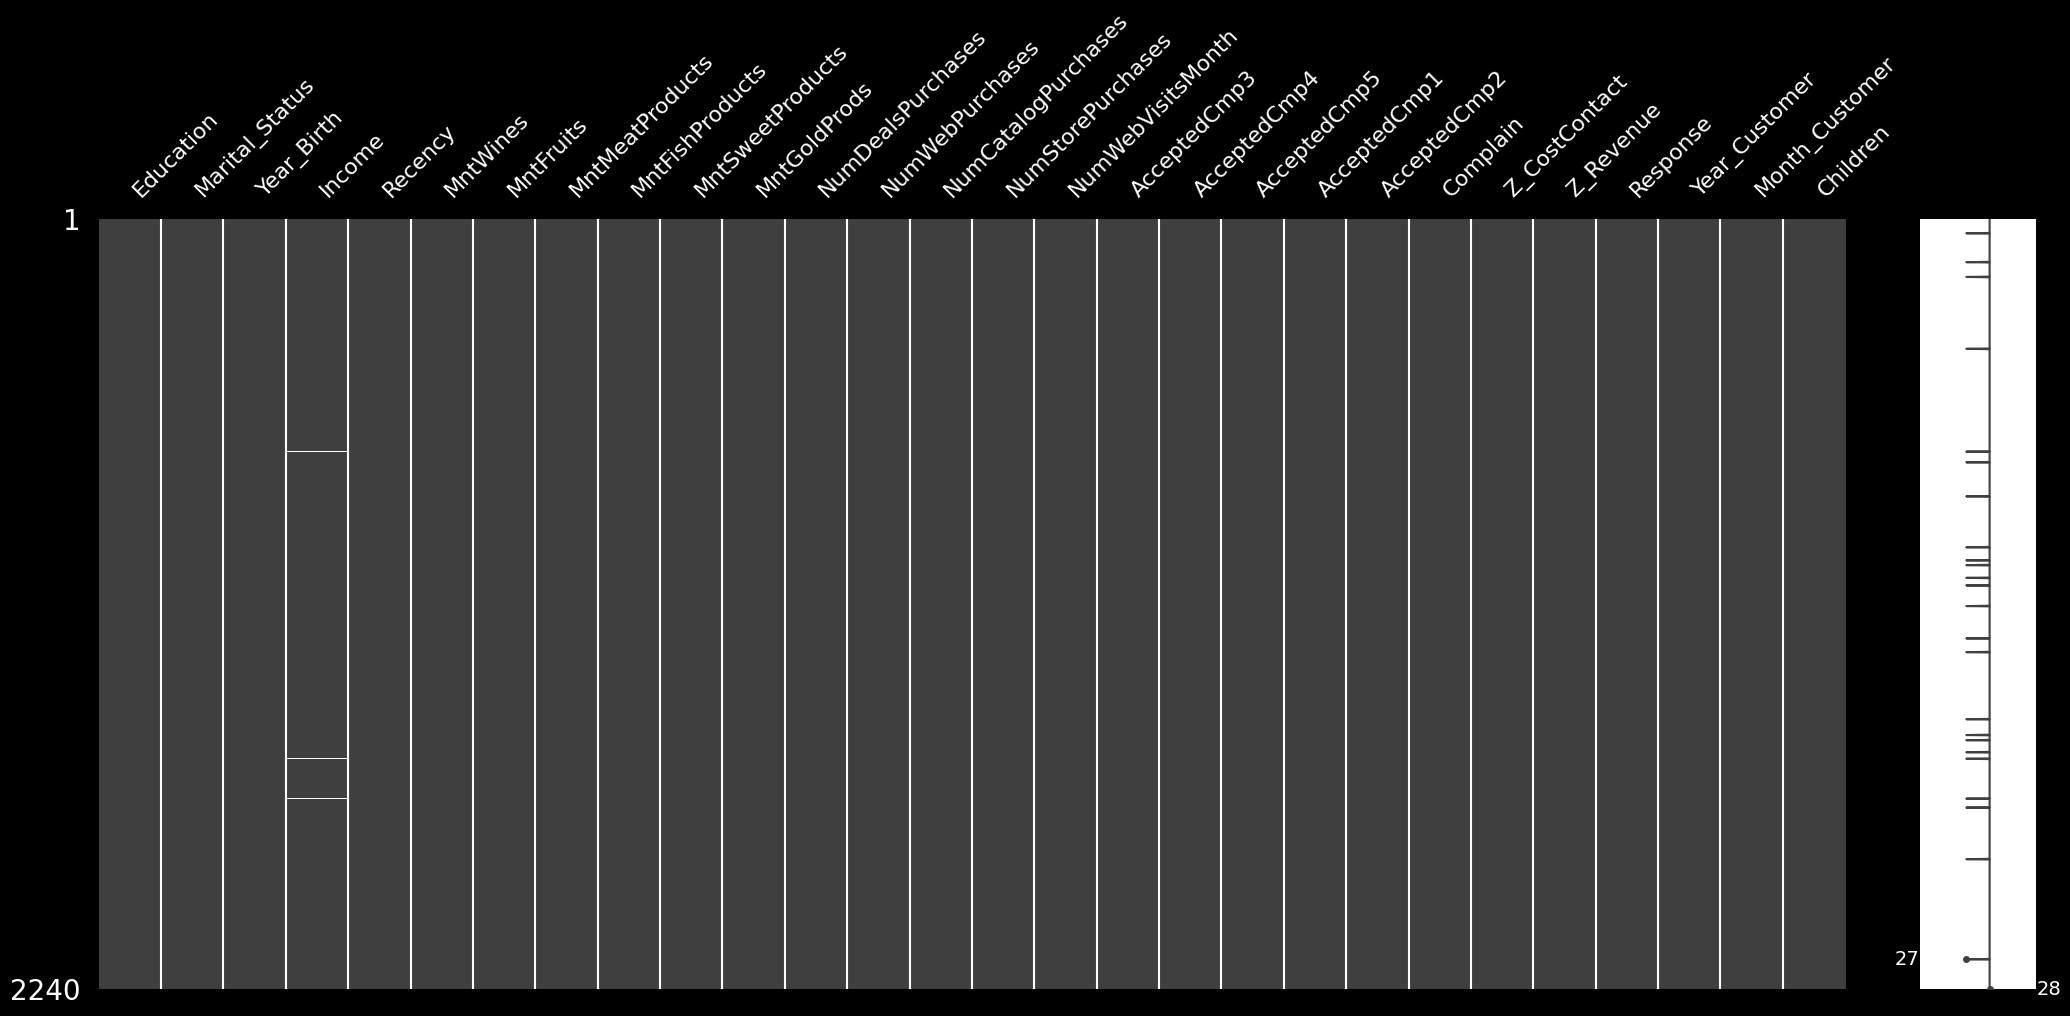

In [33]:
missingno.matrix(df=df_campaign_transformed)

><div style="background-color: #F6FFF6;"> 
><div style="font-weight: bold;font-size:18px">Observations</div>
><ul style="font-size:16px;">
>
>In our examined columns:
<br>- These missing data are associated within the category Missing Completely At Random (MCAR) or Missing At Random (MAR), I decided to impute them by the KNN method.
></ul>
></div>

In [34]:
knn_imputer = sklearn.impute.KNNImputer()

df_campaign_imputeknn = df_campaign_transformed.copy(deep=True)

df_campaign_imputeknn.iloc[:, :] = knn_imputer.fit_transform(df_campaign_imputeknn).round()

In [35]:
(
    pd.concat(
        [
            df_campaign_imputeknn,
            df_campaign_transformed.missing.create_shadow_matrix(True, False, suffix="_imp", only_missing=True)
        ],
        axis=1
    )
    .pipe(
        lambda df: (
            px.scatter(
                df,
                x="Income",
                y="MntWines",
                color='Income_imp',
                marginal_x="box", 
                marginal_y="box"
            )
        )
    )
)

In [36]:
df_campaign_imputeknn.missing.number_missing()

0

### Duplicate data handling

In [37]:
df_campaign_imputeknn[df_campaign_imputeknn.duplicated()]

Education  Marital_Status  Year_Birth   Income  Recency  \
Dt_Customer                                                            
2012-08-10         0.0             1.0      1988.0  68655.0     95.0   
2012-08-12         0.0             0.0      1974.0  67445.0     63.0   
2012-08-12         0.0             0.0      1974.0  67445.0     63.0   
2012-08-17         0.0             0.0      1977.0  42014.0     56.0   
2012-08-18         0.0             1.0      1975.0  46098.0     86.0   
...                ...             ...         ...      ...      ...   
2014-06-08         0.0             0.0      1966.0  44794.0     99.0   
2014-06-10         0.0             0.0      1946.0  64014.0     56.0   
2014-06-15         1.0             0.0      1961.0  28249.0     80.0   
2014-06-25         0.0             0.0      1969.0  68695.0      3.0   
2014-06-26         0.0             0.0      1963.0  80124.0     47.0   

             MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Dt_Customer                                                          
2012-08-10      456.0       19.0            832.0             75.0   
2012-08-12      757.0       80.0            217.0             29.0   
2012-08-12      757.0       80.0            217.0             29.0   
2012-08-17      244.0       15.0            108.0              4.0   
2012-08-18       57.0        0.0             27.0              0.0   
...               ...        ...              ...              ...   
2014-06-08       54.0        0.0              7.0              0.0   
2014-06-10      406.0        0.0             30.0              0.0   
2014-06-15        1.0        9.0              7.0              2.0   
2014-06-25      458.0       81.0            356.0            106.0   
2014-06-26      483.0       84.0            398.0            205.0   

             MntSweetProducts  ...  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
Dt_Customer                    ...                                             
2012-08-10              118.0  ...           0.0           0.0           0.0   
2012-08-12               80.0  ...           0.0           0.0           0.0   
2012-08-12               80.0  ...           0.0           0.0           0.0   
2012-08-17               15.0  ...           0.0           0.0           0.0   
2012-08-18                0.0  ...           0.0           0.0           0.0   
...                       ...  ...           ...           ...           ...   
2014-06-08                0.0  ...           0.0           0.0           0.0   
2014-06-10                0.0  ...           0.0           1.0           0.0   
2014-06-15               14.0  ...           0.0           0.0           0.0   
2014-06-25               50.0  ...           0.0           0.0           0.0   
2014-06-26               84.0  ...           0.0           0.0           0.0   

             Complain  Z_CostContact  Z_Revenue  Response  Year_Customer  \
Dt_Customer                                                                
2012-08-10        0.0            3.0       11.0       0.0         2012.0   
2012-08-12        0.0            3.0       11.0       0.0         2012.0   
2012-08-12        0.0            3.0       11.0       0.0         2012.0   
2012-08-17        0.0            3.0       11.0       1.0         2012.0   
2012-08-18        0.0            3.0       11.0       0.0         2012.0   
...               ...            ...        ...       ...            ...   
2014-06-08        0.0            3.0       11.0       0.0         2014.0   
2014-06-10        0.0            3.0       11.0       0.0         2014.0   
2014-06-15        0.0            3.0       11.0       0.0         2014.0   
2014-06-25        0.0            3.0       11.0       0.0         2014.0   
2014-06-26        0.0            3.0       11.0       0.0         2014.0   

             Month_Customer  Children  
Dt_Customer                            
2012-08-10              8.0       0.0  
2012-08-12     

><div style="background-color: #F6FFF6;"> 
><div style="font-weight: bold;font-size:18px">Observations</div>
><ul style="font-size:16px;">
>
>In our examined columns:
<br>- We check for the presence of duplicate data and remove it.
></ul>
></div>

In [38]:
df_campaign_imputeknn.duplicated().value_counts()

False    2055
True      185
dtype: int64

In [39]:
df_campaign_imputeknn.drop_duplicates(inplace=True)

### Number of unique values present in each column

In [40]:
df_campaign_imputeknn.nunique()

Education                 2
Marital_Status            2
Year_Birth               59
Income                 1997
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
Year_Customer             3
Month_Customer           12
Children                  4
dtype: int64

><div style="background-color: #F6FFF6;"> 
><div style="font-weight: bold;font-size:18px">Observations</div>
><ul style="font-size:16px;">
>
>In our examined columns:
<br>- "Z_CostContact" and "Z_Revenue" have the same value in all rows, so they won't contribute anything to building the model. So we can release them.
></ul>
></div>

In [41]:
df_campaign_imputeknn = df_campaign_imputeknn.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)

In [42]:
df_campaign_imputeknn = reduce_memory_usage(df_campaign_imputeknn, verbose=True)

Mem. usage decreased to 0.12 Mb (71.3% reduction)


## EDA

### Univariate analysis with Pandas Profiling library

In [43]:
profile = ProfileReport(
    df_campaign_imputeknn, title="Pandas Profiling Report", html={"style": {"primary_color": "#FA0087"}},
    minimal=True
)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

><div style="background-color: #F6FFF6;"> 
><div style="font-weight: bold;font-size:18px">Observations</div>
><ul style="font-size:16px;">
>
>In our examined graphs:
<br>-  Education - 2 classed
<br>-  Marital_Status - 2 classed
<br>-  Year_Birth - outlier left side
<br>-  Income - outliers right side
<br>-  Recency - datetime need to correct
<br>-  MntWines - right asymmetric distribution
<br>-  MntFruits - right asymmetric distribution
<br>-  MntMeatProducts - right asymmetric distribution
<br>-  MntFishProducts -  right asymmetric distribution
<br>-  MntGoldProducts - right asymmetric distribution
<br>-  NumDealsPurchases - right asymmetric distribution
<br>-  NumWebPurchases - right asymmetric distribution
<br>-  NumCatalogPurchases - right asymmetric distribution
<br>-  NumStorePurchases - right asymmetric distribution
<br>-  NumWebVisitsMonth - left asymmetric distribution
<br>-  AcceptedCmp1 - 2 classes imbalanced in favor of class 0 
<br>-  AcceptedCmp2 - 2 classes imbalanced in favor of class 0 
<br>-  AcceptedCmp3 - 2 classes imbalanced in favor of class 0 
<br>-  AcceptedCmp4 - 2 classes imbalanced in favor of class 0 
<br>-  AcceptedCmp5 - 2 classes imbalanced in favor of class 0 
<br>-  Complain - 2 classes imbalanced in favor of class 0 
<br>-  Response - 2 classes imbalanced in favor of class 0
<br>-  Year_Customer - 3 classes
<br>-  Month_Customer - 12 classes
<br>-  Children - 4 classes
></ul>
></div>

### Distribution Analysis

In [44]:
columns_numeric = ['Year_Birth',
               'Income', 'Recency', 'MntWines', 'MntFruits',
               'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
               'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
               'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

In [45]:
pio.templates['new_template']['layout']['font'] = {'family': 'verdana', 'size': 10, 'color': 'white'}

# plotly setup
plot_rows=2
plot_cols=7
fig = make_subplots(rows=plot_rows, cols=plot_cols, shared_yaxes=False)
# add traces
x = 0
for i in range(1, plot_rows + 1):
    for j in range(1, plot_cols + 1):
        fig.add_trace(go.Box(y=df_campaign_imputeknn[columns_numeric[x]].values,
                             name = df_campaign_imputeknn[columns_numeric].columns[x],
                            ),
                     row=i,
                     col=j)
        x=x+1
fig.update_layout(
    width=1500,
    height=800)

fig.show()

><div style="background-color: #F6FFF6;"> 
><div style="font-weight: bold;font-size:18px">Observations</div>
><ul style="font-size:16px;">
>
>In our examined graphs:
<br>- We detect a possible outlier in the 'Income' column with a value of 666666, we will assume that it is an erroneous data or a TYPO, we will analyze how much the average of this column impacts and we will substitute the average without this value.
<br>- We detected 3 possible outliers in the 'Year_Birth' column with values from 1900 to 1893, which, taking into account the value 1900, would have a difference of 96 years with the Year_Birth of the minor in the dataset, without adding the years until he could buy. We'll assume it's a bad data or a TYPO, analyze how much the average of this column impacts, and substitute with the average without these values.
></ul>
></div>

#### Analysis by Income

In [46]:
df_campaign_imputeknn[df_campaign_imputeknn['Income'] > 300000]

Education  Marital_Status  Year_Birth    Income  Recency  \
Dt_Customer                                                             
2013-06-02         0.0             0.0      1977.0  666666.0     23.0   

             MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Dt_Customer                                                          
2013-06-02        9.0       14.0             18.0              8.0   

             MntSweetProducts  ...  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
Dt_Customer                    ...                                             
2013-06-02                1.0  ...           0.0           0.0           0.0   

             AcceptedCmp1  AcceptedCmp2  Complain  Response  Year_Customer  \
Dt_Customer                                                                  
2013-06-02            0.0           0.0       0.0       0.0         2013.0   

             Month_Customer  Children  
Dt_Customer                            
2013-06-02              6.0       1.0  

[1 rows x 26 columns]

In [47]:
df_campaign_imputeknn['Income'].mean()

52349.832

In [48]:
df_campaign_imputeknn['Income'][df_campaign_imputeknn['Income'] < 300000].mean()

52050.746

In [49]:
df_campaign_imputeknn['Income'] = df_campaign_imputeknn['Income'].replace(666666.0, df_campaign_imputeknn['Income'][df_campaign_imputeknn['Income'] < 300000].mean())

df_campaign_imputeknn[df_campaign_imputeknn['Income'] > 300000]

Empty DataFrame
Columns: [Education, Marital_Status, Year_Birth, Income, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Response, Year_Customer, Month_Customer, Children]
Index: []

[0 rows x 26 columns]

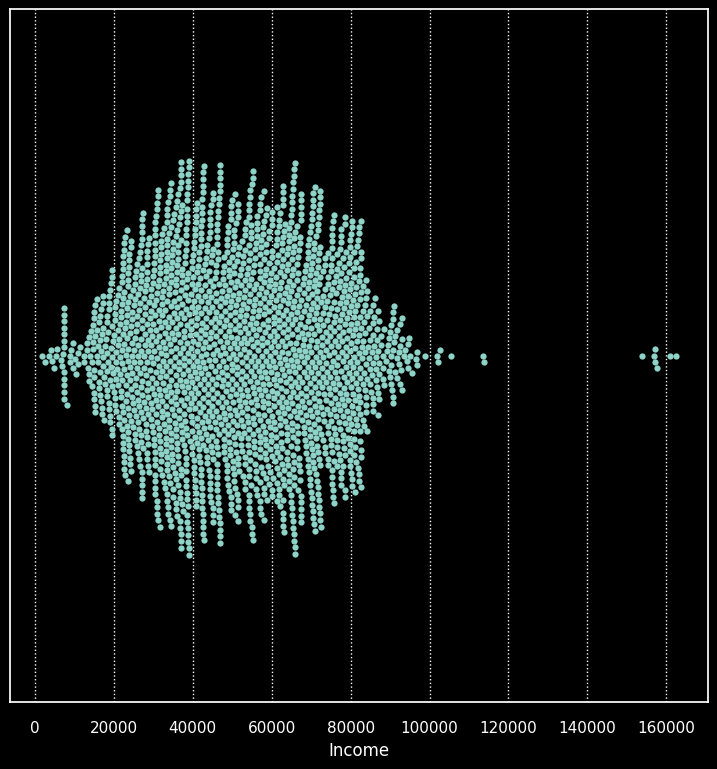

In [50]:
g = sns.swarmplot(data=df_campaign_imputeknn, x='Income', s=4.5, orient="h")

plt.show(g)

#### Analysis by YearBirth

In [51]:
df_campaign_imputeknn[df_campaign_imputeknn['Year_Birth'] < 1920]

Education  Marital_Status  Year_Birth   Income  Recency  \
Dt_Customer                                                            
2013-09-26         0.0             0.0      1899.0  83532.0     36.0   
2013-09-26         0.0             1.0      1900.0  36640.0     99.0   
2014-05-17         0.0             1.0      1893.0  60182.0     23.0   

             MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Dt_Customer                                                          
2013-09-26      755.0      144.0            562.0            104.0   
2013-09-26       15.0        6.0              8.0              7.0   
2014-05-17        8.0        0.0              5.0              7.0   

             MntSweetProducts  ...  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
Dt_Customer                    ...                                             
2013-09-26               64.0  ...           0.0           0.0           1.0   
2013-09-26                4.0  ...           0.0           0.0           0.0   
2014-05-17                0.0  ...           0.0           0.0           0.0   

             AcceptedCmp1  AcceptedCmp2  Complain  Response  Year_Customer  \
Dt_Customer                                                                  
2013-09-26            0.0           0.0       0.0       0.0         2013.0   
2013-09-26            0.0           0.0       1.0       0.0         2013.0   
2014-05-17            0.0           0.0       0.0       0.0         2014.0   

             Month_Customer  Children  
Dt_Customer                            
2013-09-26              9.0       0.0  
2013-09-26              9.0       1.0  
2014-05-17              5.0       1.0  

[3 rows x 26 columns]

In [52]:
round(df_campaign_imputeknn.Year_Birth.astype("float32").mean(), 0)

1969.0

In [53]:
df_campaign_imputeknn['Year_Birth'][df_campaign_imputeknn['Year_Birth'] > 1920].astype("float32").mean()

1968.8782

In [54]:
df_campaign_imputeknn['Year_Birth'] = df_campaign_imputeknn['Year_Birth'].replace([1899.0, 1900.0, 1893.0], round(df_campaign_imputeknn['Year_Birth'][df_campaign_imputeknn['Year_Birth'] > 1920].astype("float32").mean(), 0))

df_campaign_imputeknn[df_campaign_imputeknn['Year_Birth'] < 1920]

Empty DataFrame
Columns: [Education, Marital_Status, Year_Birth, Income, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Response, Year_Customer, Month_Customer, Children]
Index: []

[0 rows x 26 columns]

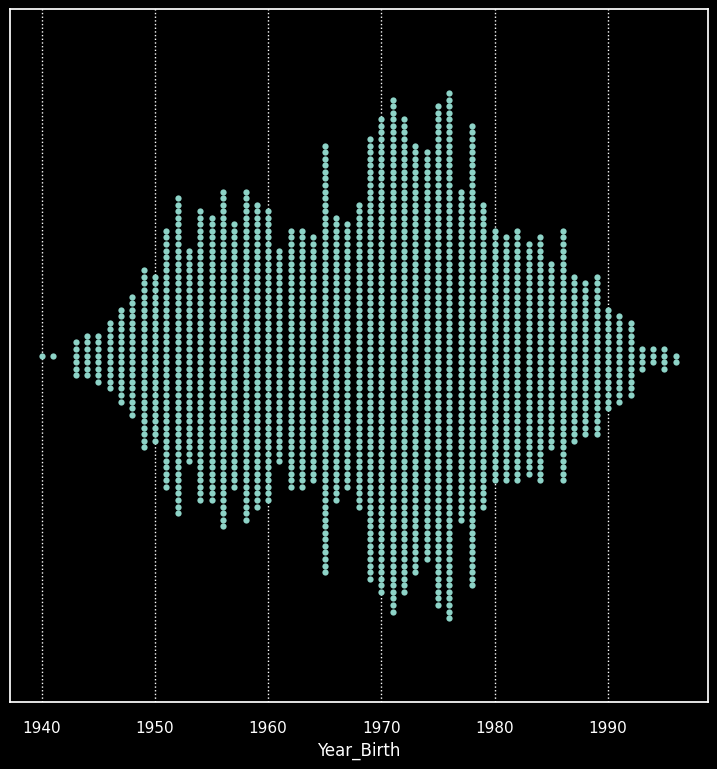

In [55]:
g = sns.swarmplot(data=df_campaign_imputeknn, x='Year_Birth', s=4.5, orient="h")

plt.show(g)

### Percentage analysis of categorical variables:

In [56]:
columns_categorical = ['Children', 'Education', 'Marital_Status', 'Response']

In [57]:
from plotly.subplots import make_subplots

pio.templates['new_template']['layout']['font'] = {'family': 'verdana', 'size': 10, 'color': 'white'}



# plotly setup
plot_rows=1
plot_cols=4
fig = make_subplots(rows=plot_rows, 
                    cols=plot_cols, 
                    shared_yaxes=False,
                    vertical_spacing=0.1,
                    subplot_titles=('1', '2', '3', '4'),
                    specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}]]
                   )
# add traces
x = 0
names = {}
count = 1
for i in range(1, plot_rows + 1):
    for j in range(1, plot_cols + 1):
        fig1 = px.pie(df_campaign_imputeknn, values='Income', names=columns_categorical[x])

        trace1 = fig1.data[0]
        fig.add_trace(trace1,
                     row=i,
                     col=j)
        names[str(count)]=columns_categorical[x]
        x=x+1
        count = count + 1

fig.for_each_annotation(lambda a: a.update(text = names[a.text]))
fig.update_layout(width=600, height=400)
fig.update_annotations(y=0.8)

fig.show()

### Correlation Analysis

In [58]:
pio.templates['new_template']['layout']['font'] = {'family': 'verdana', 'size': 8, 'color': 'white'}

fig = px.imshow(
    df_campaign_imputeknn[columns_numeric].corr(),
    color_continuous_scale=px.colors.diverging.RdBu[::-1],
    text_auto='.2f',
    zmin=-1,
    zmax=1,
)

fig.update_xaxes(tickangle=60, automargin='height')
fig.show()

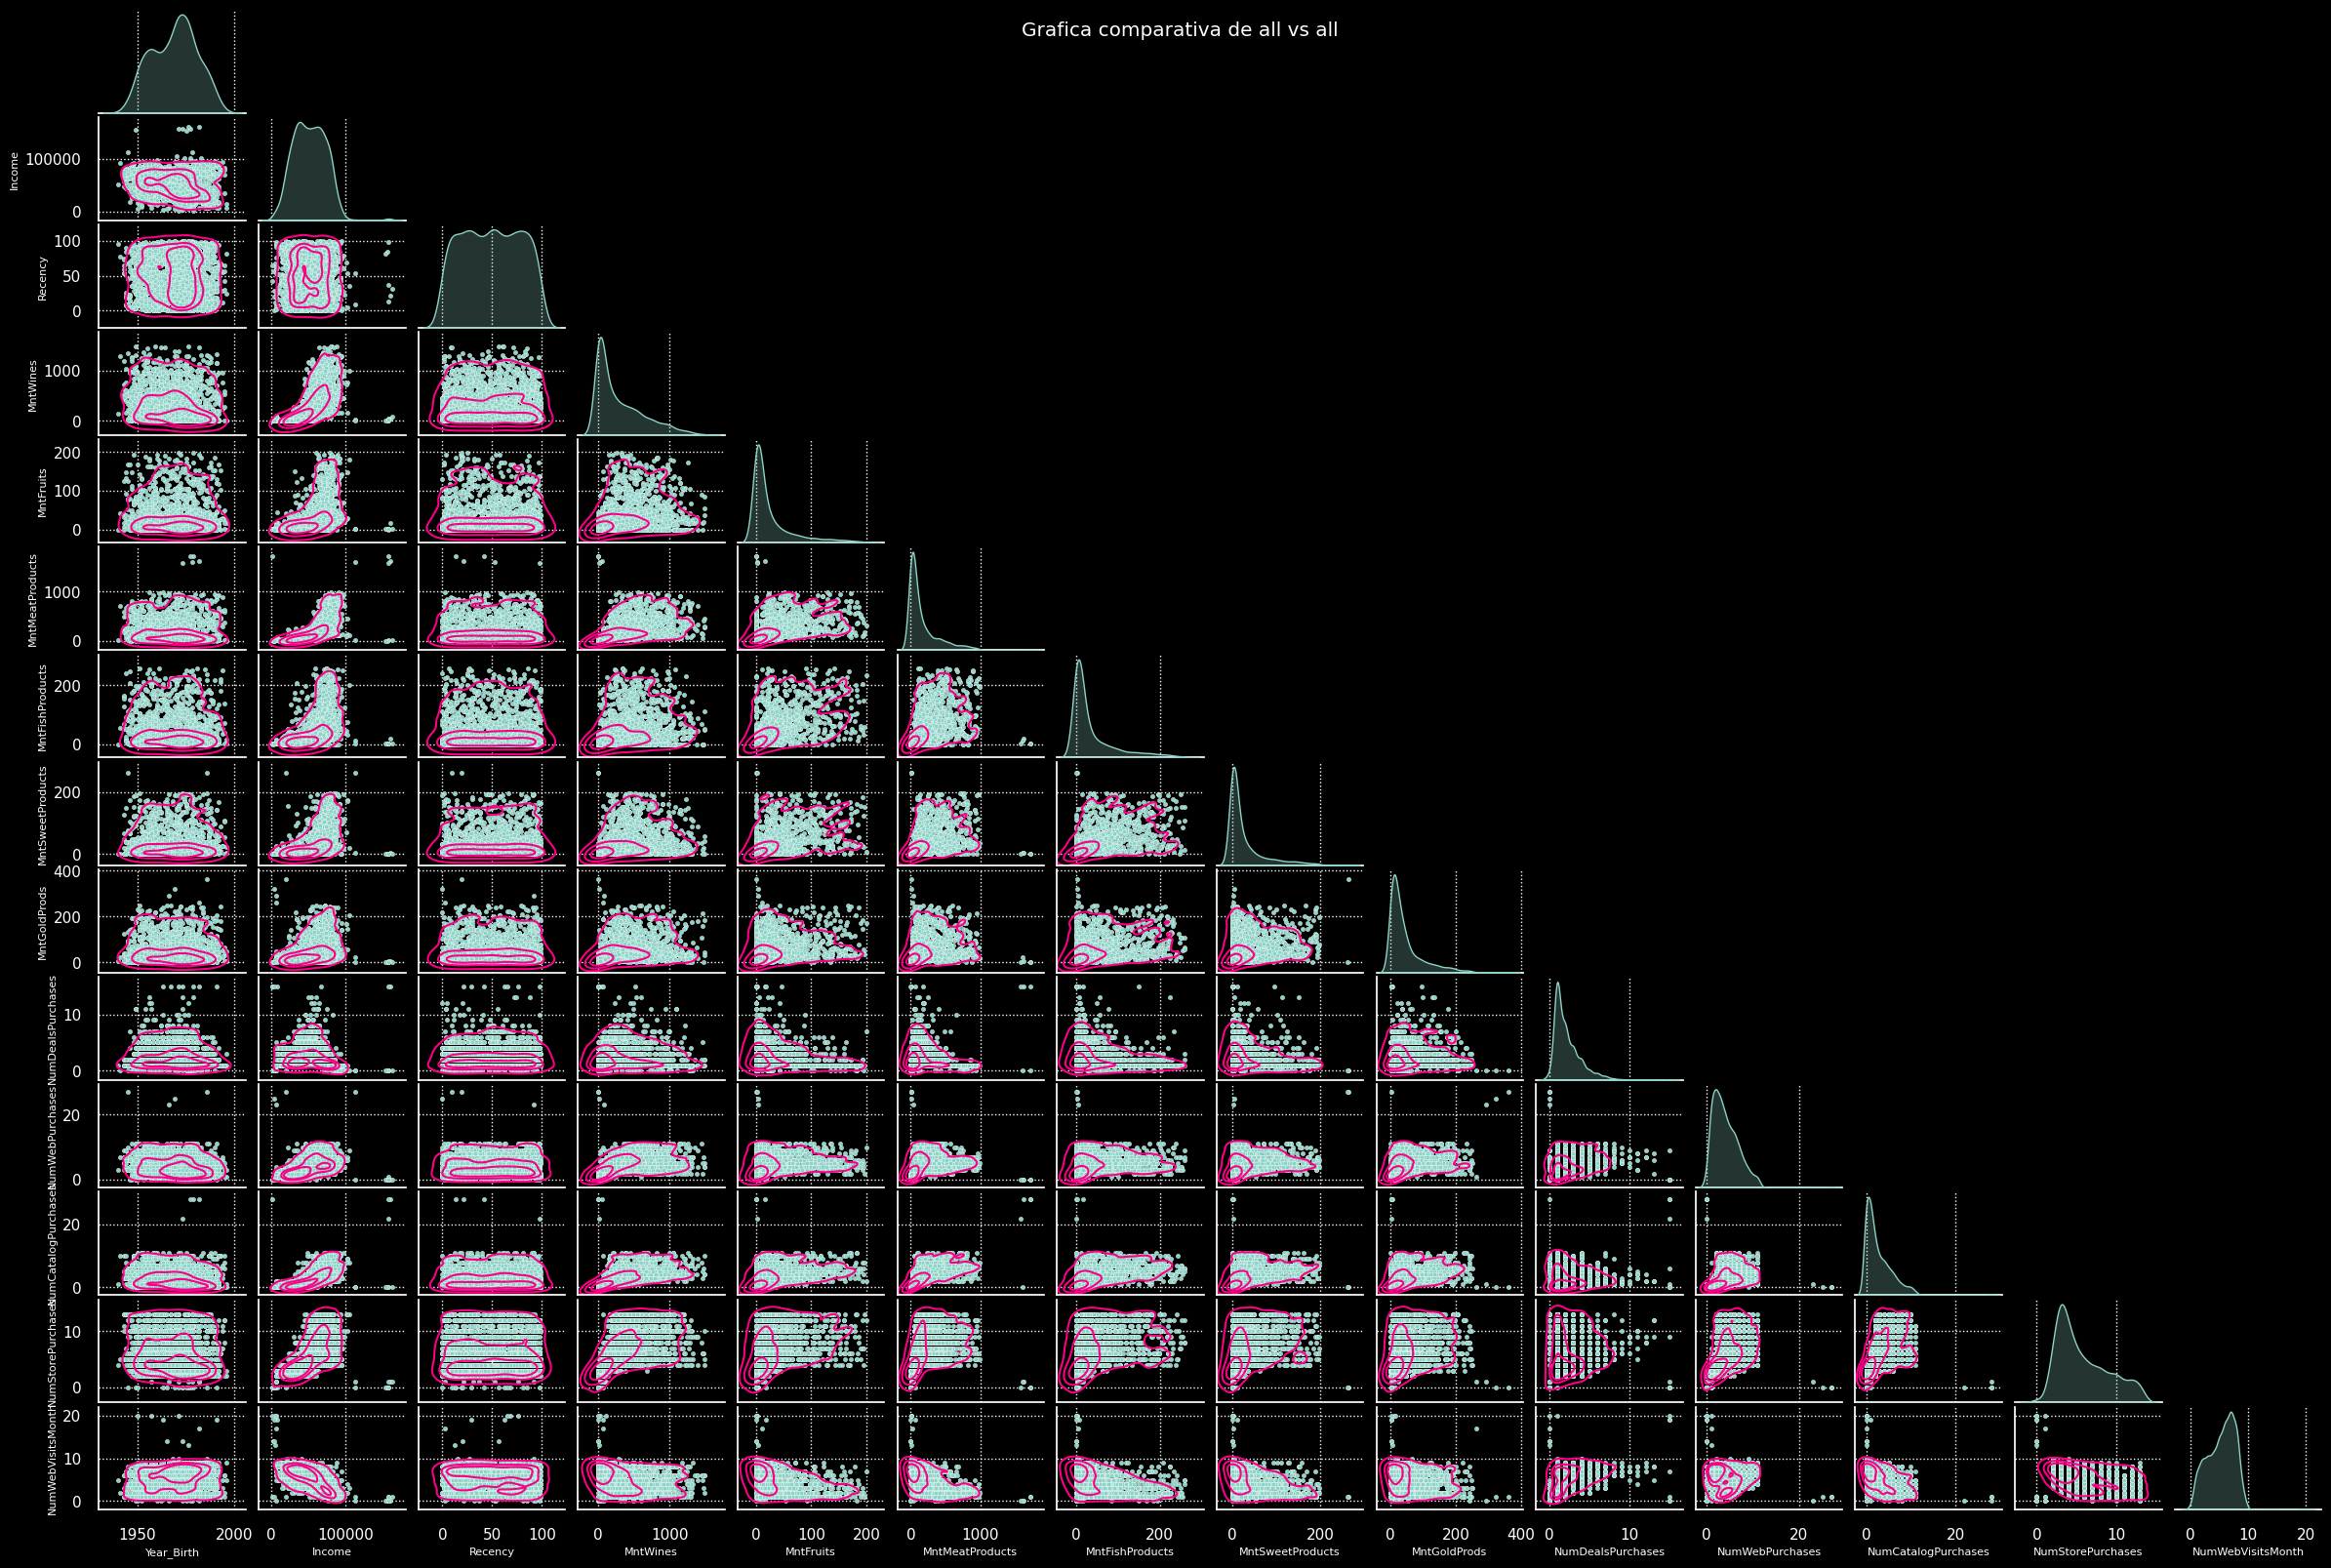

In [59]:
mpl.rcParams["axes.labelsize"] = 8
g = sns.pairplot(df_campaign_imputeknn[columns_numeric],
                 corner=True,
                 diag_kind='kde',
                 plot_kws=dict(s=10),
                 )

g.map_lower(sns.kdeplot, levels=4, color="#FA0087")

g.fig.set_size_inches(24,16)

g.fig.suptitle('Grafica comparativa de all vs all')

plt.show(g)

><div style="background-color: #F6FFF6;"> 
><div style="font-weight: bold;font-size:18px">Observations</div>
><ul style="font-size:16px;">
>
>In our examined graphs:
<br>- The higher 'Income', the higher the positive correlation is with the 'Mnt' columns, and there is a negative correlation with 'NumWebVisitsMonth'.
<br>- There is a positive correlation between the 'Mnt' columns, apparently if you spend more on any of them, it implies that you spend more on all the others. And vice versa.
></ul>
></div>

### Multivariable analysis

In [60]:
marital_status = (
    categorical_transformer
    .named_transformers_
    .get('ordinalencoder-2')
    .inverse_transform(
        X = [[0], [1]]
    )
)
education_status = (
    categorical_transformer
    .named_transformers_
    .get('ordinalencoder-1')
    .inverse_transform(
        X = [[0], [1]]
    )
)

In [61]:
pio.templates['new_template']['layout']['font'] = {'family': 'verdana', 'size': 16, 'color': 'white'}

fig = px.histogram(df_campaign_imputeknn, x="Year_Birth", color="Marital_Status", opacity=0.8, barmode='overlay')

fig.update_layout(
    title=f"Histogram Marital Status, 0={marital_status[0]} and 1={marital_status[1]}",
)

fig.show()

fig = px.histogram(df_campaign_imputeknn, x="Year_Birth", color="Education", opacity=0.8, barmode='overlay')

fig.update_layout(
    title=f"Histogram Education, 0={education_status[0]} and 1={education_status[1]}",
)

fig.show()

In [62]:
hist_data = [df_campaign_imputeknn["Year_Birth"]]
group_labels = ["distplot"]  # name of the dataset

fig = ff.create_distplot(hist_data, group_labels, bin_size=1, colors=["#FA0087"])

fig.update_layout(
    title="Year Birth costumers"
)

fig.show()

><div style="background-color: #F6FFF6;"> 
><div style="font-weight: bold;font-size:18px">Observations</div>
><ul style="font-size:16px;">
>
>In our examined graphs:
<br>- We can appreciate a bimodal distribution in the 'Year_Birth'.
></ul>
></div>

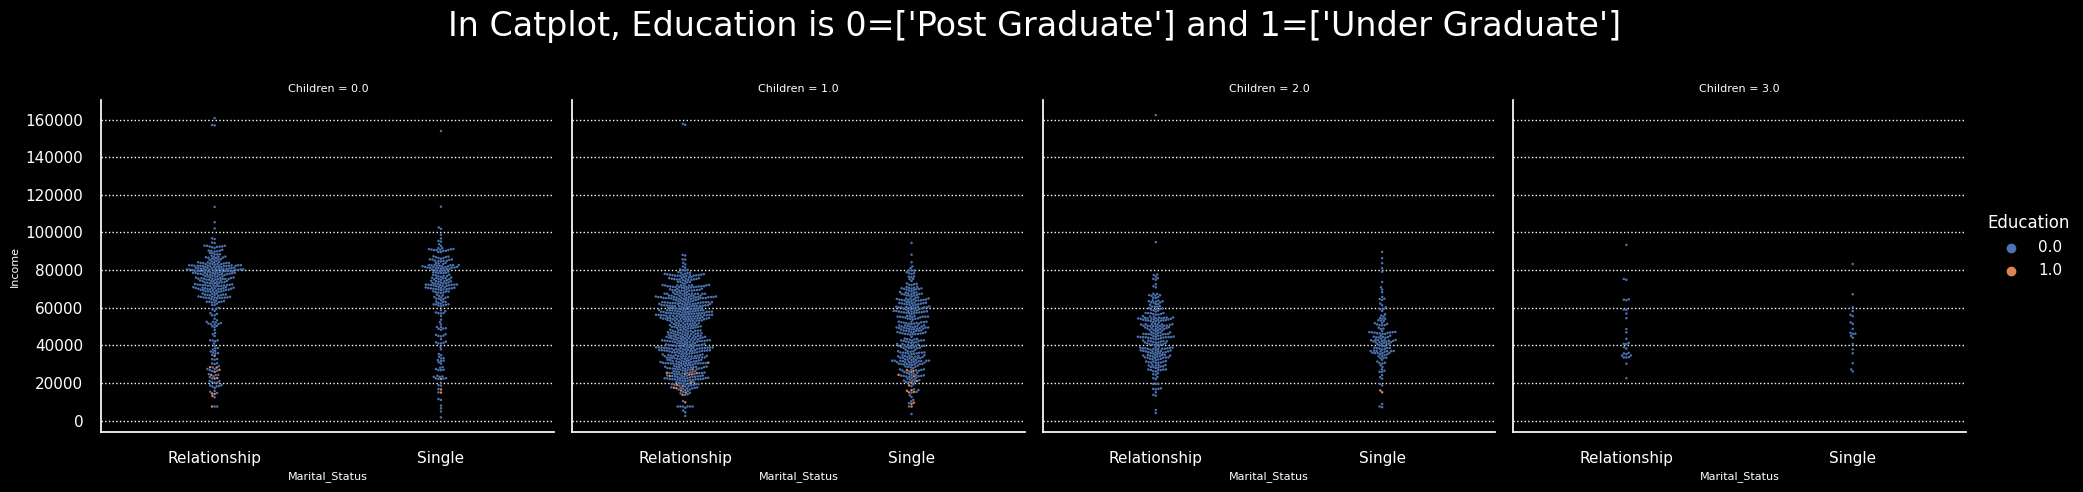

In [63]:
g = sns.catplot(
    data=df_campaign_imputeknn, kind="swarm",
    x="Marital_Status", y="Income",
    hue='Education',
    col="Children",
    s=3.2, 
    palette="deep", 
)


g.set_xticklabels(["Relationship", "Single"])
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle(f"In Catplot, Education is 0={education_status[0]} and 1={education_status[1]}",
                  fontsize=24, fontdict={"weight": "bold"})


plt.show(g)

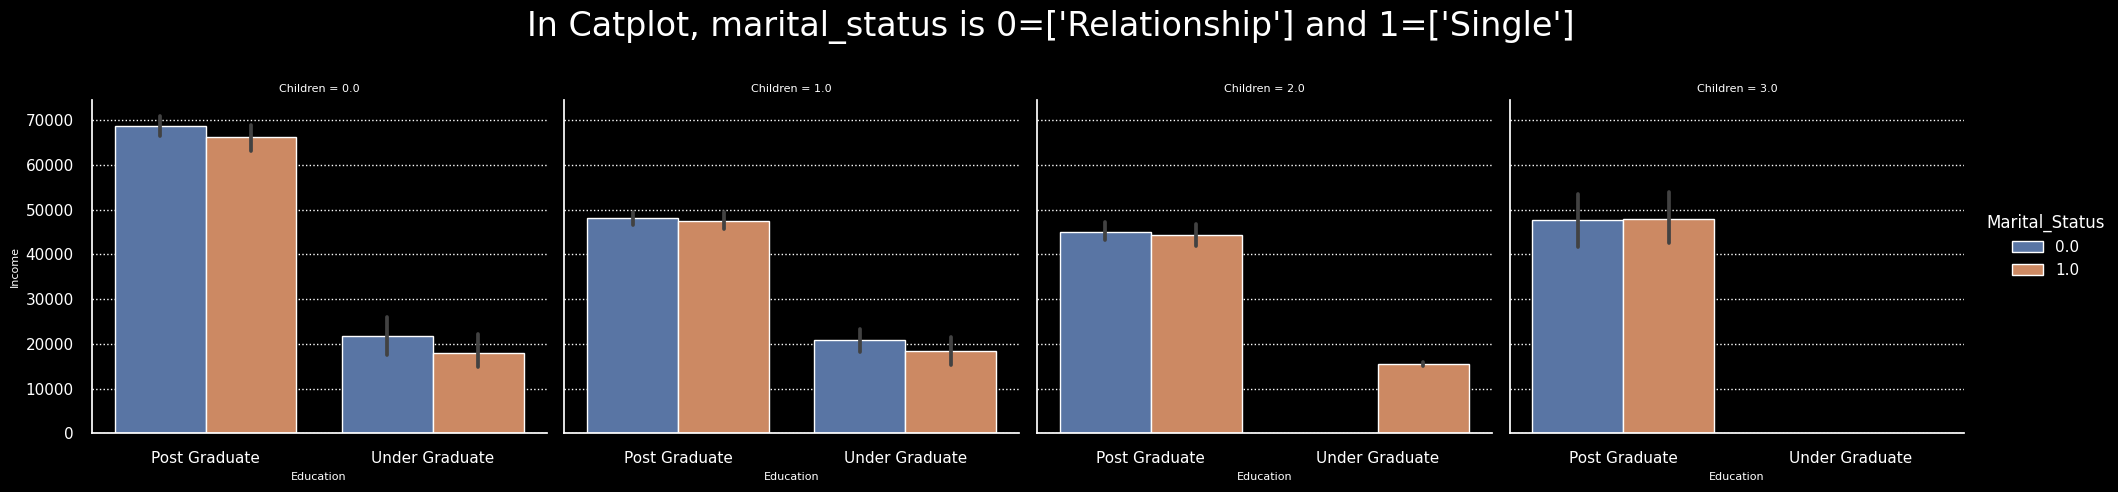

In [64]:
g = sns.catplot(
    data=df_campaign_imputeknn, kind="bar",
    x="Education", y="Income",
    hue='Marital_Status',
    col="Children",
    palette="deep", 
)


g.set_xticklabels(["Post Graduate", "Under Graduate"])
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle(f"In Catplot, marital_status is 0={marital_status[0]} and 1={marital_status[1]}",
                  fontsize=24, fontdict={"weight": "bold"})


plt.show(g)

><div style="background-color: #F6FFF6;"> 
><div style="font-weight: bold;font-size:18px">Observations</div>
><ul style="font-size:16px;">
>
>In our examined graphs:
<br>- Families with fewer children at home appear to be earning higher wages.
<br>- No family with Education=Under Graduate, has 3 children.
></ul>
></div>

#### Products by number of children at home

In [65]:
df_campaign_imputeknn[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds', 'Children']].groupby('Children').mean()

MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Children                                                          
0.0        493.750  53.000000         379.5000        76.687500   
1.0        265.500  19.140625          98.6250        26.515625   
2.0        142.750   7.964844          51.6250        11.781250   
3.0        172.125   7.500000          66.3125         7.312500   

          MntSweetProducts  MntGoldProds  
Children                                  
0.0              53.875000      64.00000  
1.0              20.296875      40.65625  
2.0               8.515625      25.75000  
3.0               7.230469      19.06250

In [66]:
df_campaign_imputeknn[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds', 'Children']].groupby('Children').sum()

MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Children                                                          
0.0            inf    30576.0              inf          44224.0   
1.0            inf    19968.0              inf          27648.0   
2.0        55232.0     3084.0          19968.0           4560.0   
3.0         8256.0      360.0           3184.0            351.0   

          MntSweetProducts  MntGoldProds  
Children                                  
0.0                31088.0       36928.0  
1.0                21184.0       42400.0  
2.0                 3296.0        9968.0  
3.0                  347.0         915.0

><div style="background-color: #F6FFF6;"> 
><div style="font-weight: bold;font-size:18px">Observations</div>
><ul style="font-size:16px;">
>
>In our examined columns:
<br>- The smaller the number of children at home, the spending on wines increases.
<br>- Families with fewer children at home spend more on average in all categories, which is a contradiction because as there are fewer people, they should consume fewer products. This may be because those with fewer children may be receiving higher salaries.
></ul>
></div>

#### Variable analysis Place of Dataset

In [67]:
subplots_edad = df_campaign_imputeknn.groupby(['Year_Birth']).sum()

In [68]:
fig = make_subplots(
    rows=4,
    cols=1,
    subplot_titles=(
        "NumStorePurchases for Year_Birth",
        "NumWebPurchases for Year_Birth",
        "NumWebVisitsMonth for Year_Birth",
        "NumCatalogPurchases for Year_Birth"
    ),
    shared_xaxes=True,
    vertical_spacing=0.1
)

fig.add_trace(go.Scatter(x=subplots_edad.index, y=subplots_edad.NumStorePurchases, mode="lines", name="NumStorePurchases", opacity=0.8),
    row=1,
    col=1,
)

fig.add_trace(go.Scatter(x=subplots_edad.index, y=subplots_edad.NumWebPurchases, mode="lines", name="NumWebPurchases", opacity=0.8),
    row=2,
    col=1,
)

fig.add_trace(go.Scatter(x=subplots_edad.index, y=subplots_edad.NumWebVisitsMonth, mode="lines", name="NumWebVisitsMonth", opacity=0.8),
    row=3,
    col=1,
)

fig.add_trace(go.Scatter(x=subplots_edad.index, y=subplots_edad.NumCatalogPurchases, mode="lines", name="NumCatalogPurchases", opacity=0.8),
    row=4,
    col=1,
)

fig.update_layout(title_text="Subplots variables Place of Dataset")

fig.show()

#### Mnts by year and month

In [69]:
products = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntGoldProds']

for _ in products:
    fig = px.histogram(df_campaign_imputeknn, x='Year_Customer', y=_, color="Month_Customer", barmode='relative', title="Mnts for Year_Customer")
    fig.update_layout(width=800, height=600, bargap=0.2)
    fig.update_xaxes(tickvals=[2012, 2013, 2014])
    fig.show()

><div style="background-color: #F6FFF6;"> 
><div style="font-weight: bold;font-size:18px">Observations</div>
><ul style="font-size:16px;">
>
>In our examined graphs:
<br>- We can see that in the middle of the last year recorded, the metrics have been much lower than in the same period of the previous year.
></ul>
></div>

## Scaling Data and PCA

### Scaling Data

In [70]:
scaler = StandardScaler()
df_campaign_scaled = scaler.fit_transform(df_campaign_imputeknn)

In [71]:
df_campaign_scaled = pd.DataFrame(df_campaign_scaled, columns = df_campaign_imputeknn.columns )

In [72]:
df_campaign_scaled

Education  Marital_Status  Year_Birth    Income   Recency  MntWines  \
0     -0.156291       -0.749367    0.096237  0.144065  0.793639 -0.033274   
1     -0.156291       -0.749367   -1.619751  0.007059 -0.448473  0.546106   
2     -0.156291       -0.749367    1.383228 -2.065552  1.690720 -0.888974   
3     -0.156291       -0.749367    0.611034 -2.065552 -1.035026 -0.883032   
4     -0.156291       -0.749367   -0.847556  1.415274  0.586620  2.679413   
...         ...             ...         ...       ...       ...       ...   
2050  -0.156291       -0.749367    0.010438  1.283507  0.793639  0.795685   
2051  -0.156291        1.334461    0.611034  1.293104  0.793639 -0.538375   
2052  -0.156291       -0.749367   -1.276553  0.851719  1.690720  0.519365   
2053  -0.156291        1.334461   -1.448152  0.792419  0.034570  0.427259   
2054  -0.156291        1.334461   -1.104954 -0.774777 -1.656083 -0.823608   

      MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
0     -0.660663        -0.354322        -0.610377         -0.388420  ...   
1     -0.132497         0.306943         0.340742          1.936260  ...   
2     -0.233100        -0.660868        -0.445761         -0.316523  ...   
3     -0.660663        -0.682765        -0.445761         -0.484284  ...   
4      0.722628         1.213445         2.389307         -0.220660  ...   
...         ...              ...              ...               ...  ...   
2050  -0.459457         0.280668        -0.262853          0.833834  ...   
2051   3.464057         0.429562         3.468462          0.066929  ...   
2052   0.043558        -0.139739         0.688267         -0.316523  ...   
2053  -0.560060        -0.586421        -0.573796         -0.556181  ...   
2054  -0.660663        -0.682765        -0.683540         -0.628078  ...   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0        -0.280607     -0.288599     -0.278584     -0.265165       -0.1132   
1        -0.280607     -0.288599     -0.278584     -0.265165       -0.1132   
2        -0.280607     -0.288599     -0.278584     -0.265165       -0.1132   
3         3.563706     -0.288599     -0.278584     -0.265165       -0.1132   
4        -0.280607     -0.288599      3.589587     -0.265165       -0.1132   
...            ...           ...           ...           ...           ...   
2050     -0.280607     -0.288599     -0.278584      3.771236       -0.1132   
2051     -0.280607     -0.288599     -0.278584     -0.265165       -0.1132   
2052     -0.280607     -0.288599     -0.278584     -0.265165       -0.1132   
2053     -0.280607      3.465015     -0.278584     -0.265165       -0.1132   
2054     -0.280607     -0.288599     -0.278584     -0.265165       -0.1132   

      Complain  Response  Year_Customer  Month_Customer  Children  
0    -0.099136  2.368062      -1.505515        0.153773  1.396885  
1    -0.099136 -0.422286      -1.505515        0.153773 -1.274682  
2    -0.099136 -0.422286      -1.505515        0.439233  0.061102  
3    -0.099136  2.368062      -1.505515        0.439233  0.061102  
4    -0.099136 -0.422286      -1.505515        0.439233 -1.274682  
...        ...       ...            ...             ...       ...  
2050 -0.099136 -0.422286       1.414573       -0.131687 -1.274682  
2051 -0.099136 -0.422286       1.414573       -0.131687 -1.274682  
2052 -0.099136 -0.422286       1.414573       -0.131687  0.061102  
2053 -0.099136 -0.422286       1.414573       -0.131687  0.061102  
2054 -0.099136 -0.422286       1.414573       -0.131687  1.396885  

[2055 rows x 26 columns]

In [74]:
df_campaign_scaled = reduce_memory_usage(df_campaign_scaled, verbose=True)

Mem. usage decreased to 0.10 Mb (50.0% reduction)


### PCA

><div style="background-color: #F6FFF6;"> 
><div style="font-weight: bold;font-size:18px">Observations</div>
><ul style="font-size:16px;">
>
>Then:
<br>- We compare PCA with IncrementalPCA. Since there is the alternative of this algorithm that can be much more efficient in memory.
></ul>
></div>

In [88]:
n = 15

principal_components = {
    'PCA': PCA(n_components=n , svd_solver="arpack"),
    'IncrementalPCA': IncrementalPCA(n_components=n)
}

fig = go.Figure()

for name, principal_component in principal_components.items():
    pca = principal_component
    pca.fit(df_campaign_scaled)

    cum_var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100) 

    # Aqui anexamos a la misma figura cada trazo
    fig.add_trace(go.Scatter(
        x=list(range(1, len(principal_component.explained_variance_) + 1)),
        y=cum_var,
        name=name,
        mode='lines+markers',
    ))

    # Aqui verificamos que varianza de datos esta agrupando el metodo usado para nuestros features
    components = principal_component.fit_transform(df_campaign_scaled)

    total_var = principal_component.explained_variance_ratio_.sum() * 100
    print(f"Total Explained Variance: {total_var:.2f}%, to {n} components with {name}")

# Aqui ejecutamos el plot de nuestra grafica
fig.update_layout(showlegend=True)

fig.show()

Total Explained Variance: 84.37%, to 15 components with PCA
Total Explained Variance: 83.50%, to 15 components with IncrementalPCA


In [79]:
pca = PCA()
pca.fit(df_campaign_scaled)
pca_data_scaled = pca.transform(df_campaign_scaled)

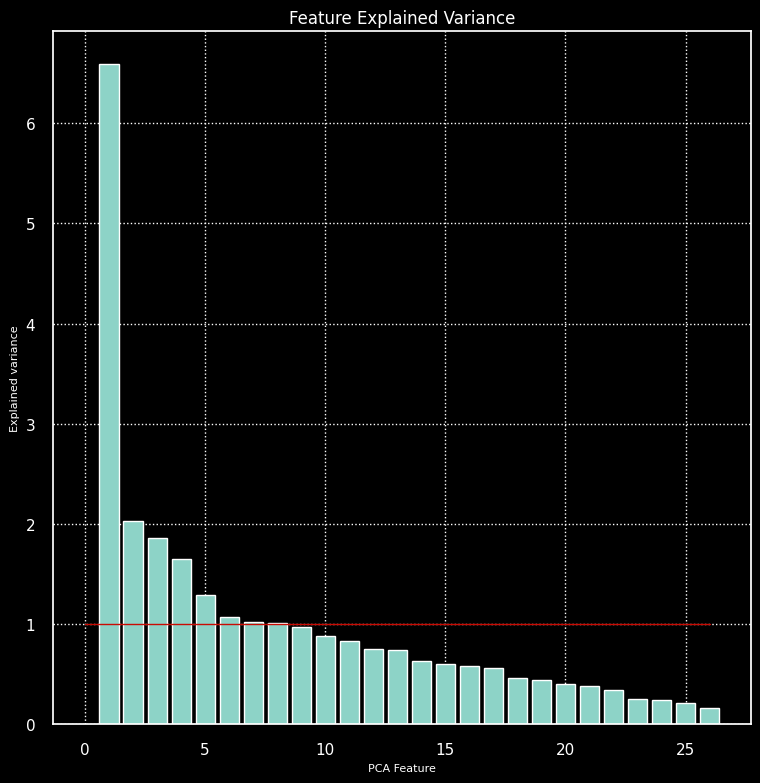

In [80]:
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
    
plt.plot([1]*(len(pca.explained_variance_)+1), 'r', linewidth=1)

plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

In [89]:
pca_data_standard = pd.DataFrame(pca_data_scaled[:,0:8], columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])

pca_data_standard.head(1)

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.889754  2.428874  0.302726 -0.071191  0.272338 -0.098448 -0.382604   

        PC8  
0  0.411168

In [90]:
pca_data_standard = reduce_memory_usage(pca_data_standard, verbose=True)

Mem. usage decreased to 0.03 Mb (74.9% reduction)


## Clustering

### K-means

#### Elbow graph to determine optimal value of n_clusters

Elbow value= 4


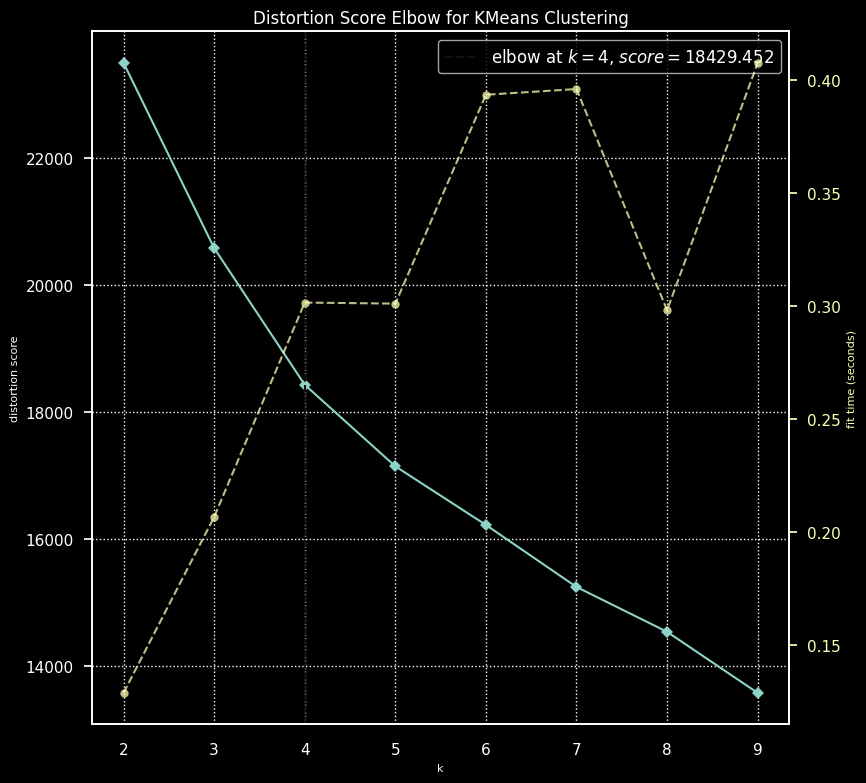

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [91]:
fig_elb = KElbowVisualizer(KMeans(random_state=42, n_init=10, max_iter=10000), k=(2,10))
fig_elb.fit(pca_data_standard)
print(f'Elbow value= {fig_elb.elbow_value_}')
fig_elb.show()

><div style="background-color: #F6FFF6;"> 
><div style="font-weight: bold;font-size:18px">Observations</div>
><ul style="font-size:16px;">
>
>In our examined graphs:
<br>- Our graph tells us that the optimal value for clusters is 4.
></ul>
></div>

In [92]:
Sum_of_squared_distances = []
silhouette_scores = []
K = range(2,10) 
for _ in K:
    km = KMeans(n_clusters = _, n_init=10, random_state=42, max_iter=1000)
    y = km.fit_predict(pca_data_standard)
    Sum_of_squared_distances.append(km.inertia_)
    silhouette_scores.append(silhouette_score(pca_data_standard,y))

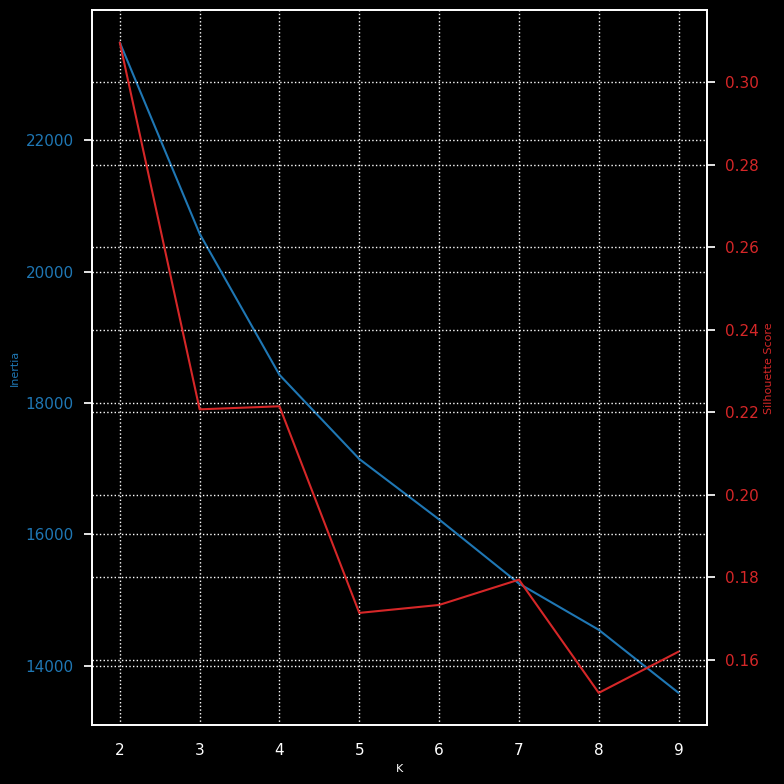

In [93]:
fig, ax1 = plt.subplots(figsize=(8,8))

color = 'tab:blue'
ax1.set_xlabel('K')
ax1.set_ylabel('Inertia', color=color)
ax1.plot(K, Sum_of_squared_distances, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:red'
ax2.set_ylabel('Silhouette Score', color=color)  
ax2.plot(K, silhouette_scores, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

><div style="background-color: #F6FFF6;"> 
><div style="font-weight: bold;font-size:18px">Observations</div>
><ul style="font-size:16px;">
>
>In our examined graphs:
<br>- We were able to verify what was indicated by the graph created with the KElbowVisualizer library.
></ul>
></div>

#### Verification of optimal value of n_clusters by silhouette scores graph and scatter plot

In [109]:
pio.templates['new_template']['layout']['plot_bgcolor'] = 'white'

range_n_clusters = [2,3,4,5]

figures = []

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig = make_subplots(rows=1, cols=2,
                        print_grid=False,
                        subplot_titles=('The silhouette plot for the various clusters.',
                                              'The visualization of the clustered data.'))

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    fig['layout']['xaxis1'].update(title='The silhouette coefficient values',
                                   range=[-0.1, 1])

    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    fig['layout']['yaxis1'].update(title='Cluster label',
                                   showticklabels=False,
                                   range=[0, len(pca_data_standard) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42, n_init=10, max_iter=1000)
    cluster_labels = clusterer.fit_predict(pca_data_standard)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(pca_data_standard, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pca_data_standard, cluster_labels)
    y_lower = 10

    color = []

    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i


        colors = mpl.colors.colorConverter.to_rgb(cm.nipy_spectral(float(i) / n_clusters))
        colors = 'rgb'+str(colors)
        color.append(colors)
        filled_area = go.Scatter(y=np.arange(y_lower, y_upper),
                                 x=ith_cluster_silhouette_values,
                                 mode='lines',
                                 showlegend=False,
                                 line=dict(width=0.5,
                                          color=colors),
                                 fill='tozerox',
                                 name='Silhouette')
        fig.add_traces(filled_area, 1, 1)

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples


        # The vertical line for average silhouette score of all the values
        axis_line = go.Scatter(x=[silhouette_avg, silhouette_avg],
                               y=[0, y_upper],
                               showlegend=False,
                               mode='lines',
                               line=dict(color="red", dash='dash',
                                         width =2) )


        fig.append_trace(axis_line, 1, 1)


#   2nd Plot showing the actual clusters formed
    clusters = go.Scatter(x=pca_data_standard['PC1'], 
                          y=pca_data_standard['PC2'], 
                          showlegend=False,
                          mode='markers',
                          marker=dict(color=cluster_labels,
                                     size=4, colorscale=color),
                          name='Data'
                         )
    fig.append_trace(clusters, 1, 2)

    # Labeling the clusters
    centers_ = clusterer.cluster_centers_
#     Draw white circles at cluster centers

    df_k_means_center = pd.DataFrame(
        {
            'x1':centers_[:,0],
            'x2':centers_[:,1]

        }
    )

    centers = go.Scatter(x=df_k_means_center.x1, 
                         y=df_k_means_center.x2,
                         showlegend=True,
                         text=list(range(1, n_clusters + 1)),
                         mode='markers',
                         name='k_means_centers',
                         marker=dict(color=color, size=20,
                                     symbol="x-dot",
                                     line=dict(width=2, 
                                               color='rgb(175, 100, 88)'))
                        )

    fig.append_trace(centers, 1, 2)

    fig['layout']['xaxis2'].update(title='Feature space for the 1st feature',
                                   zeroline=False)
    fig['layout']['yaxis2'].update(title='Feature space for the 2nd feature',
                                  zeroline=False)


    fig['layout'].update(title="Silhouette analysis for KMeans clustering on sample data "
                         "with n_clusters = %d" % n_clusters)

    fig.update_layout(showlegend=True)
#     figures.append(fig)
    fig.show()

For n_clusters = 2 The average silhouette_score is : 0.30968426983467584


For n_clusters = 3 The average silhouette_score is : 0.2207267727718946


For n_clusters = 4 The average silhouette_score is : 0.22147013703721383


For n_clusters = 5 The average silhouette_score is : 0.17136093908990352


><div style="background-color: #F6FFF6;"> 
><div style="font-weight: bold;font-size:18px">Observations</div>
><ul style="font-size:16px;">
>
>In our examined graphs:
<br>- The optimal cluster number appears to be 4.
></ul>
></div>

### DBSCAN

In [95]:
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(pca_data_standard)
distances, indices = neighbors_fit.kneighbors(pca_data_standard)

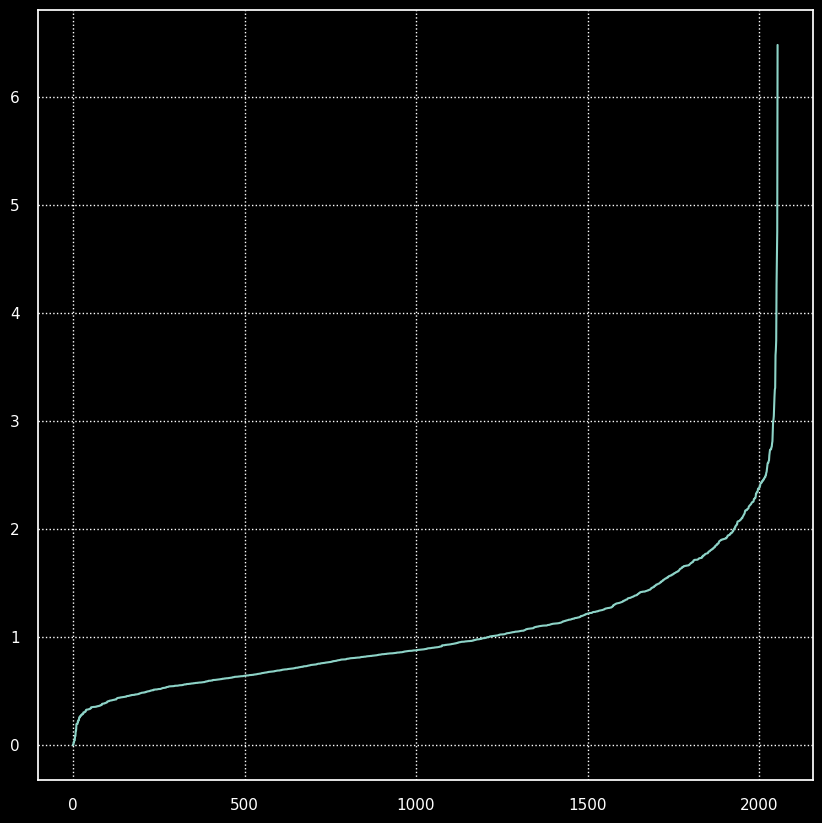

In [96]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
fig = plt.figure(figsize=(10,10))
plt.plot(distances)

><div style="background-color: #F6FFF6;"> 
><div style="font-weight: bold;font-size:18px">Observations</div>
><ul style="font-size:16px;">
>
>In our examined graphs:
<br>- Using the knee plot, we iterate to obtain a table with the optimal values for epsilon and Min_samples for DBSCAN clustering.
></ul>
></div>

In [97]:
eps_values = np.arange(1, 3, 0.10)
min_samples = np.arange(1,10)

In [98]:
dbscan_paramns = list(product(eps_values, min_samples))
no_of_clusters = []
sil_score = []
for p in dbscan_paramns:
    y_dbscan = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(pca_data_standard)
    try:
        sil_score.append(silhouette_score(pca_data_standard,y_dbscan))
    except:
        sil_score.append(0)
    no_of_clusters.append(len(np.unique(y_dbscan)))

In [99]:
df_param_tunning = pd.DataFrame.from_records(dbscan_paramns, columns=['Eps','Min_samples'])
df_param_tunning['sil_score'] = sil_score
df_param_tunning['n_clusters'] = no_of_clusters

In [100]:
pivot_1 = pd.pivot_table(df_param_tunning, values='sil_score', columns='Eps', index='Min_samples')
pivot_2 = pd.pivot_table(df_param_tunning, values='n_clusters', columns='Eps', index='Min_samples')

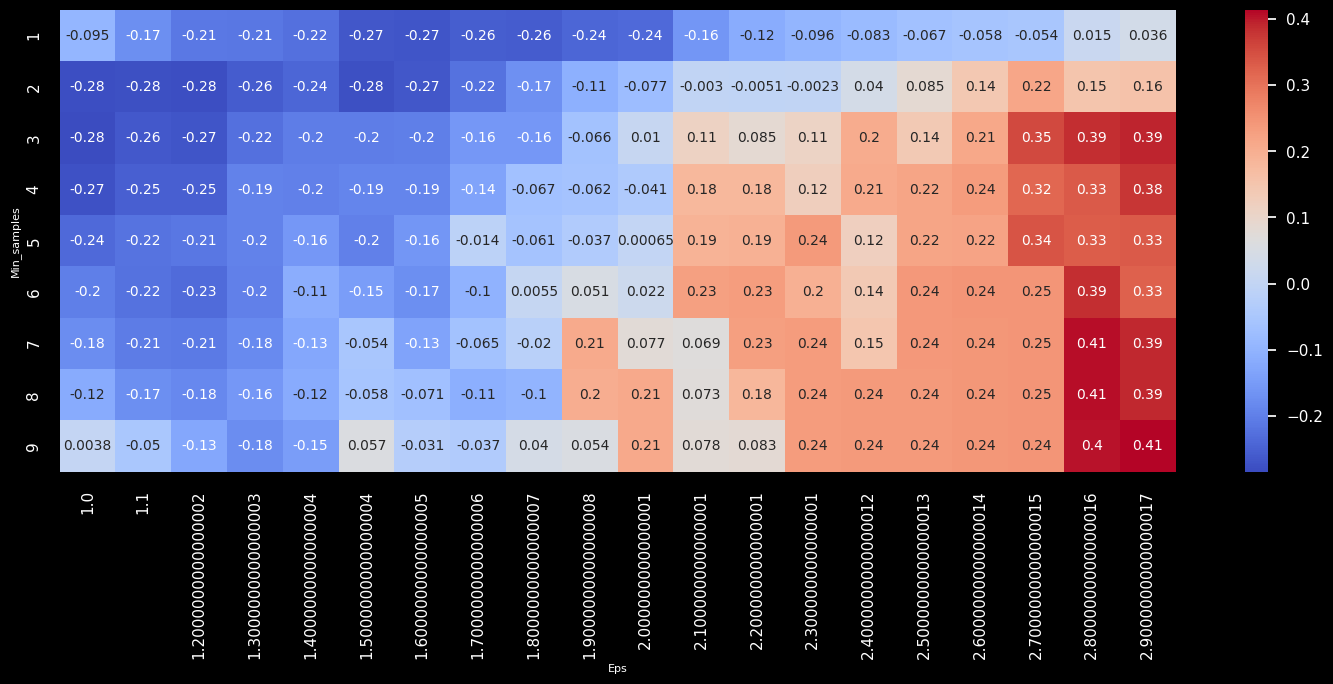

In [101]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

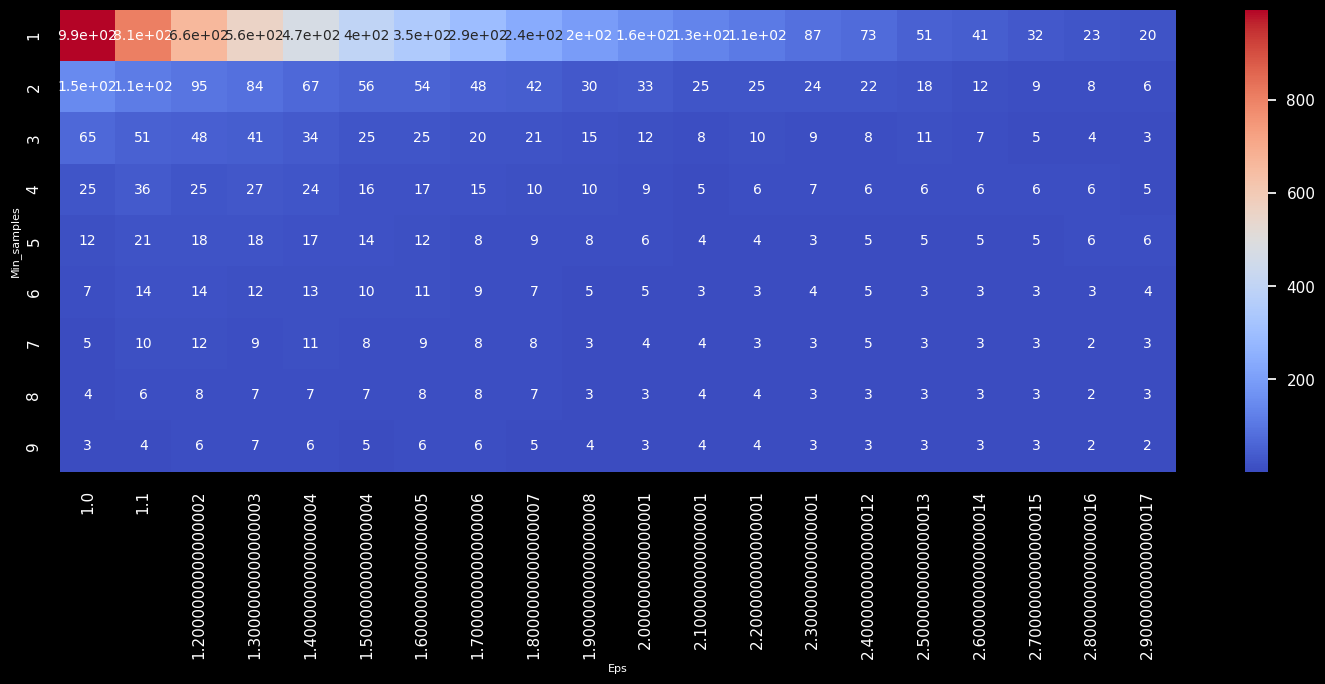

In [102]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_2, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

In [103]:
dbscan_train = DBSCAN(eps=2.8, min_samples=3)
y_dbscan = dbscan_train.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard, y_dbscan ))

0.38506316595935025


><div style="background-color: #F6FFF6;"> 
><div style="font-weight: bold;font-size:18px">Observations</div>
><ul style="font-size:16px;">
>
>In our examined graphs:
<br>- We got a higher silhouette_score than with KNN. Let's see below how the clusters look graphically with DBSCAN.
></ul>
></div>

In [105]:
figures = []

# Create a subplot with 1 row and 2 columns
fig = make_subplots(rows=1, cols=2,
                    print_grid=False,
                    subplot_titles=('The silhouette plot for the various clusters.',
                                          'The visualization of the clustered data.'))

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
fig['layout']['xaxis1'].update(title='The silhouette coefficient values',
                               range=[-0.1, 1])


# Initialize the clusterer with n_clusters value and a random generator
# seed of 10 for reproducibility.
clusterer = DBSCAN(eps=2.8, min_samples=4)
cluster_labels = clusterer.fit_predict(pca_data_standard)
n_clusters = len(np.unique(cluster_labels))


# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
fig['layout']['yaxis1'].update(title='Cluster label',
                               showticklabels=False,
                               range=[0, len(pca_data_standard) + (n_clusters + 1) * 10])


# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(pca_data_standard, cluster_labels)
print(
    "For n_clusters =",
    n_clusters,
    "The average silhouette_score is :",
    silhouette_avg,
)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(pca_data_standard, cluster_labels)

y_lower = 10

color = []

for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i - 1]
    ith_cluster_silhouette_values.sort()


    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i


    colors = mpl.colors.colorConverter.to_rgb(cm.nipy_spectral(float(i) / n_clusters))
    colors = 'rgb'+str(colors)
    color.append(colors)

    filled_area = go.Scatter(y=np.arange(y_lower, y_upper),
                             x=ith_cluster_silhouette_values,
                             mode='lines',
                             showlegend=False,
                             line=dict(width=0.5,
                                      color=colors),
                             fill='tozerox',
                             name='Silhouette')

    fig.add_traces(filled_area, 1, 1)

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples



# The vertical line for average silhouette score of all the values
axis_line = go.Scatter(x=[silhouette_avg, silhouette_avg],
                       y=[0, y_upper],
                       showlegend=False,
                       mode='lines',
                       name='Line for average silhouette',
                       line=dict(color="red", dash='dash',
                                 width =2) )


fig.append_trace(axis_line, 1, 1)


# 2nd Plot showing the actual clusters formed
clusters = go.Scatter(x=pca_data_standard['PC1'], 
                      y=pca_data_standard['PC2'], 
                      showlegend=False,
                      mode='markers',
                      marker=dict(color=cluster_labels,
                                 size=4, colorscale=color),
                      name='Data'
                     )
fig.append_trace(clusters, 1, 2)


fig['layout']['xaxis2'].update(title='Feature space for the 1st feature',
                               zeroline=False)
fig['layout']['yaxis2'].update(title='Feature space for the 2nd feature',
                              zeroline=False)


fig['layout'].update(title="Silhouette analysis for DBSCAN clustering on sample data "
                     "with n_clusters = %d" % n_clusters)

fig.update_layout(showlegend=True)
figures.append(fig)
fig.show()

For n_clusters = 4 The average silhouette_score is : 0.38506316595935025


## Comparing different clustering algorithms on datasets

><div style="background-color: #F6FFF6;"> 
><div style="font-weight: bold;font-size:18px">Observations</div>
><ul style="font-size:16px;">
>
>Then:
<br>- Having the optimal cluster value, we proceed to graphically compare how 6 different clustering methods perform the separation.
></ul>
></div>

### Comparing in 2D

In [116]:
reg_clustering = {
    'MeanShift': MeanShift,
    'AffinityPropagation': AffinityPropagation,
    'KMeans': KMeans,
    'SpectralClustering': SpectralClustering,
    'AgglomerativeClustering': AgglomerativeClustering,
    'DBSCAN': DBSCAN,
}


params_clustering = {
    'MeanShift':
        {'max_iter': 10000, 'bandwidth': estimate_bandwidth(pca_data_standard, quantile=0.2, n_samples=500), 'bin_seeding': True},
    'AffinityPropagation':
        {'damping': 0.9, 'random_state': 42, 'max_iter': 10000},
    'KMeans':
        {'n_clusters': 4, 'n_init': 10, 'random_state': 42, 'max_iter': 10000},
    'SpectralClustering':
        {'n_clusters': 4, 'assign_labels': 'cluster_qr', 'random_state': 42},
    'AgglomerativeClustering':
        {'n_clusters':4, 'linkage': 'ward'},
    'DBSCAN':
        {'eps':2.8, 'min_samples': 3},
}


row_col_clustering = {
    'MeanShift':
        {'row': 1, 'col': 1},
    'AffinityPropagation':
        {'row': 1, 'col': 2},
    'KMeans':
        {'row': 1, 'col': 3},
    'SpectralClustering':
        {'row': 2, 'col': 1},
    'AgglomerativeClustering':
        {'row': 2, 'col': 2},
    'DBSCAN':
        {'row': 2, 'col': 3},
}


fig = make_subplots(rows=2,
                    cols=3,
                    shared_yaxes=False,
                    shared_xaxes=False,
                    vertical_spacing=0.1,
                    subplot_titles=('1', '2', '3', '4', '5', '6')
                   )

names = {}
count = 1

for name, reg in reg_clustering.items():
    cluster_labels = reg(**params_clustering.get(name)).fit_predict(pca_data_standard)
    n_clusters = len(np.unique(cluster_labels))

    silhouette_avg = silhouette_score(pca_data_standard, cluster_labels)
    print(
        f'For {name}:\n',
        f"For n_clusters = {n_clusters}\n",
        f"The average silhouette_score is : {silhouette_avg}\n"
    )

    color = []

    for i in range(n_clusters):
        colors = mpl.colors.colorConverter.to_rgb(cm.nipy_spectral(float(i) / n_clusters))
        colors = 'rgb'+str(colors)
        color.append(colors)

    # add traces to subplots
    fig.add_trace(
        go.Scatter(
            x=pca_data_standard['PC1'], 
            y=pca_data_standard['PC2'], 
            showlegend=True,
            mode='markers',
            name=f'Data {name}',
            marker=dict(color=cluster_labels,
                        size=4, colorscale=color),
        ),
        **row_col_clustering.get(name)
    )

    # llenamos el diccionario con el name de cada metodo de clustering para luego se edite automaticamente 
    names[str(count)]=name
    count = count + 1

fig.for_each_annotation(lambda a: a.update(text = names[a.text]))

fig.update_layout(title=f"Subplots clustering 2D", width=1200, height=800)
fig.show()

For MeanShift:
 For n_clusters = 5
 The average silhouette_score is : 0.365681257154076

For AffinityPropagation:
 For n_clusters = 103
 The average silhouette_score is : 0.15716472612503704

For KMeans:
 For n_clusters = 4
 The average silhouette_score is : 0.22147013703721383

For SpectralClustering:
 For n_clusters = 4
 The average silhouette_score is : 0.24425918462478866

For AgglomerativeClustering:
 For n_clusters = 4
 The average silhouette_score is : 0.203489513930832

For DBSCAN:
 For n_clusters = 4
 The average silhouette_score is : 0.38506316595935025



><div style="background-color: #F6FFF6;"> 
><div style="font-weight: bold;font-size:18px">Observations</div>
><ul style="font-size:16px;">
>
>We see some interesting results:
<br>- It is difficult to determine some groups due to the high density, not all algorithms show reasonable results.
<br>- Kmeans and Agglomerative Clustering show similar clusters.
<br>- To examine the groups, we will plot the 3D distribution of all.
<br>- DBSCAN, MeanShift, SpectralClustering, and AffinityPropagation are dropped.
></ul>
></div>

### Comparing in 3D

In [126]:
pio.templates['new_template']['layout']['plot_bgcolor'] = 'black'

fig = make_subplots(rows=2,
                    cols=3,
                    shared_yaxes=False,
                    shared_xaxes=False,
                    vertical_spacing=0.1,
                    subplot_titles=('1', '2', '3', '4', '5', '6'),
                    specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}, {'type': 'scatter3d'}],
                           [{'type': 'scatter3d'}, {'type': 'scatter3d'}, {'type': 'scatter3d'}]]
                   )

names = {}
count = 1

for name, reg in reg_clustering.items():
    cluster_labels = reg(**params_clustering.get(name)).fit_predict(pca_data_standard)
    n_clusters = len(np.unique(cluster_labels))

    silhouette_avg = silhouette_score(pca_data_standard, cluster_labels)

    color = []

    for i in range(n_clusters):
        colors = mpl.colors.colorConverter.to_rgb(cm.nipy_spectral(float(i) / n_clusters))
        colors = 'rgb'+str(colors)
        color.append(colors)

    # add traces to subplots
    fig.add_trace(
        go.Scatter3d(
            x=pca_data_standard['PC1'],
            y=pca_data_standard['PC2'],
            z=pca_data_standard['PC3'],
            showlegend=False,
            mode='markers',
            name=f'Data {name}',
            marker=dict(color=cluster_labels,
                        size=4, colorscale=color),
        ),
        **row_col_clustering.get(name)
    )

    # llenamos el diccionario con el name de cada metodo de clustering para luego se edite automaticamente 
    names[str(count)]=name
    count = count + 1

fig.for_each_annotation(lambda a: a.update(text = names[a.text]))

fig.update_layout(title=f"Subplots clustering 3D",
                  width=1400,
                  height=1000,
                  template='seaborn'
                 )

fig.show()

><div style="background-color: #F6FFF6;"> 
><div style="font-weight: bold;font-size:18px">Observations</div>
><ul style="font-size:16px;">
>
>In our examined graphs:
<br>- We were able to corroborate that Kmeans and Agglomerative Clustering were the algorithms that did the best, we will take Kmeans since it was the one that obtained the best silhouette_score.
></ul>
></div>

In [120]:
km = KMeans(n_clusters=4, n_init=10, random_state=42, max_iter=10000)
y = km.fit_predict(pca_data_standard)
print(f"The average silhouette_score of KMeans is : {silhouette_score(pca_data_standard, y)}\n")
df_campaign_imputeknn['k_means_pca'] = y

The average silhouette_score of KMeans is : 0.22147013703721383



## Evaluation of results

In [121]:
columns_Numeric = ['Year_Birth',
               'Income', 'Recency', 'MntWines', 'MntFruits',
               'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
               'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
               'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'k_means_pca']

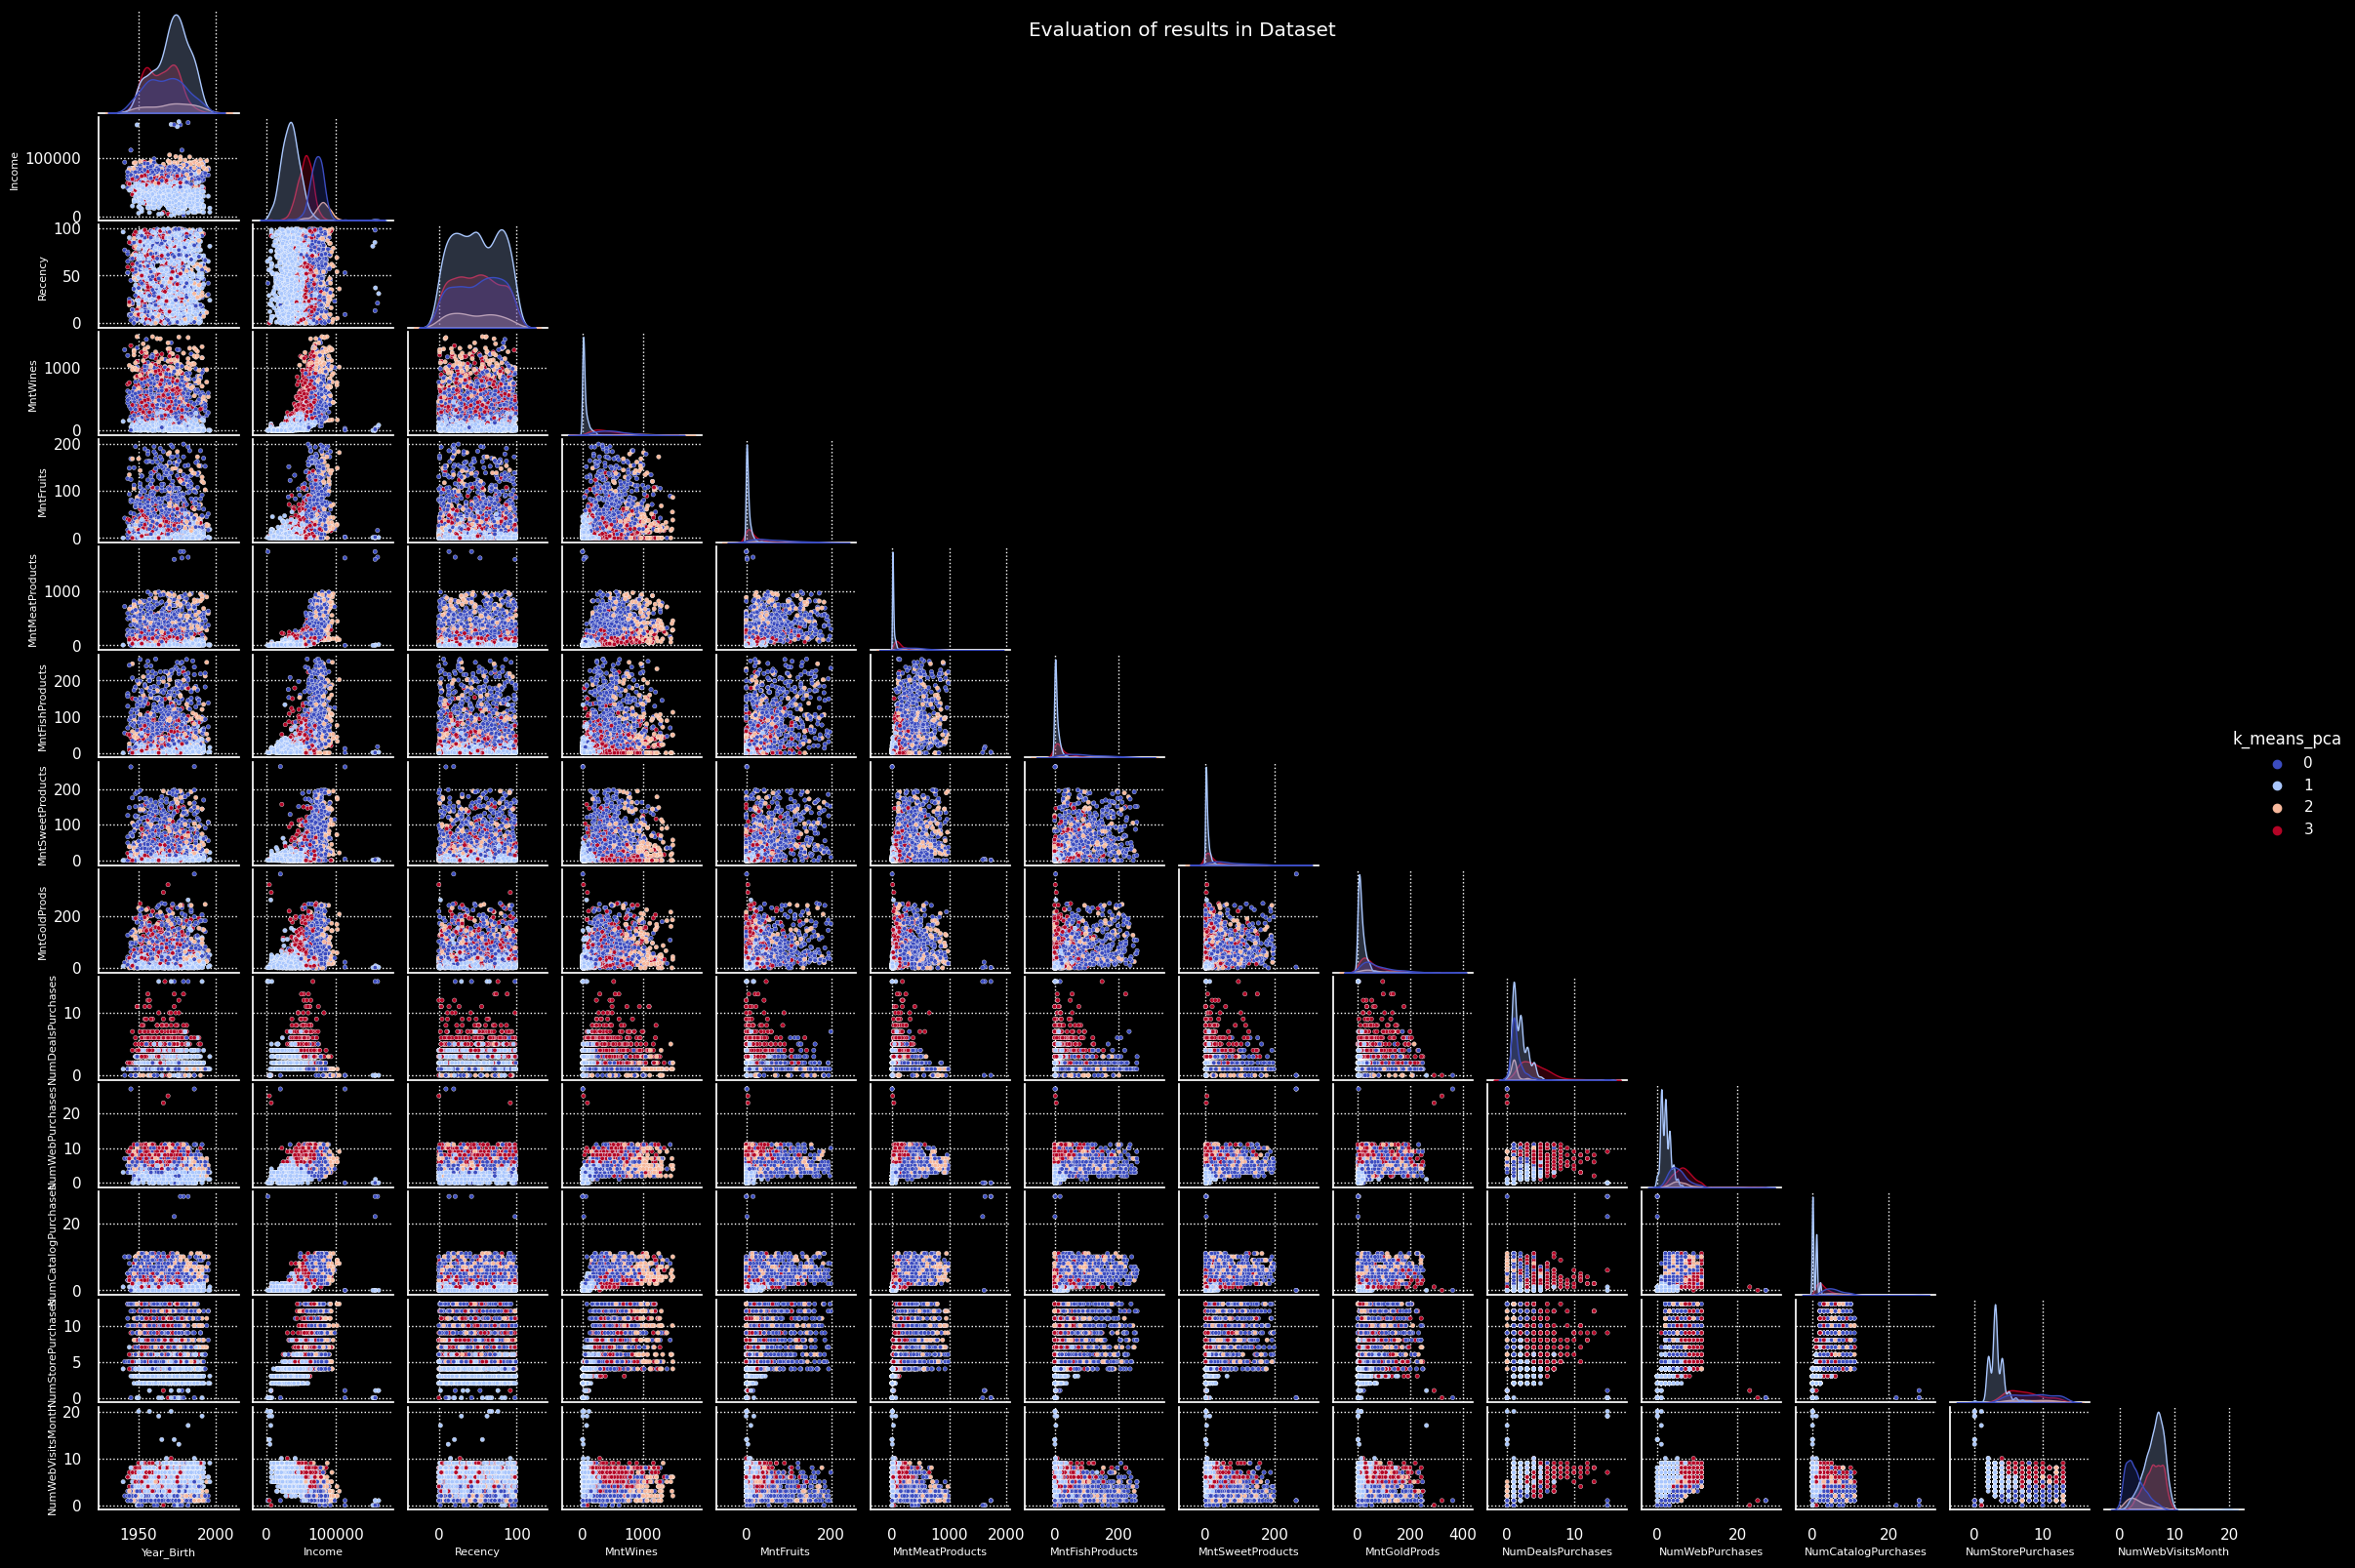

In [122]:
g = sns.pairplot(data=df_campaign_imputeknn[columns_Numeric], 
                 hue='k_means_pca', 
                 corner=True,
                 diag_kind='kde',
                 plot_kws=dict(s=10),
                 palette='coolwarm')

g.fig.set_size_inches(24,16)

g.fig.suptitle('Evaluation of results in Dataset')

plt.show(g)

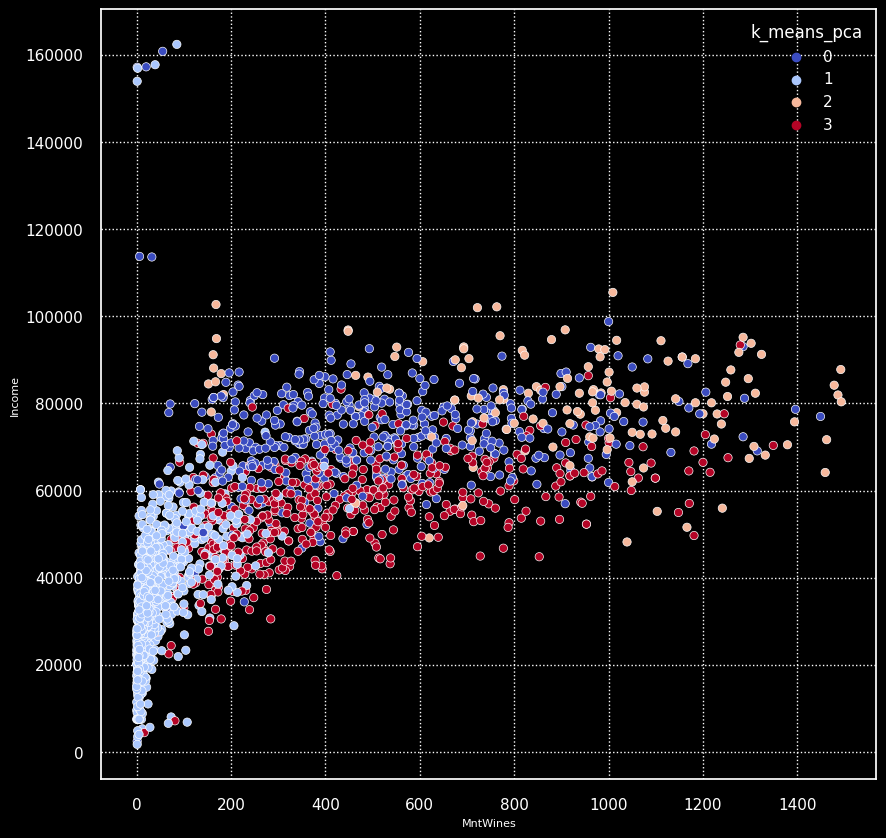

In [123]:
fig = plt.figure(figsize=(10,10))

sns.scatterplot(data=df_campaign_imputeknn, x='MntWines', y='Income',hue='k_means_pca', palette='coolwarm')

g.fig.suptitle('Evaluation of cluster in graphs 2D')

plt.show()

In [124]:
fig = px.scatter_3d(df_campaign_imputeknn, x='Income', y='MntWines', z='NumStorePurchases',
                    color='k_means_pca', color_continuous_scale=px.colors.diverging.RdBu[::-1])

fig.update_traces(marker_size=6)
fig.update_coloraxes(showscale=False)
fig.update_layout(title=f"Evaluation of cluster in graphs 3D")

fig.show()

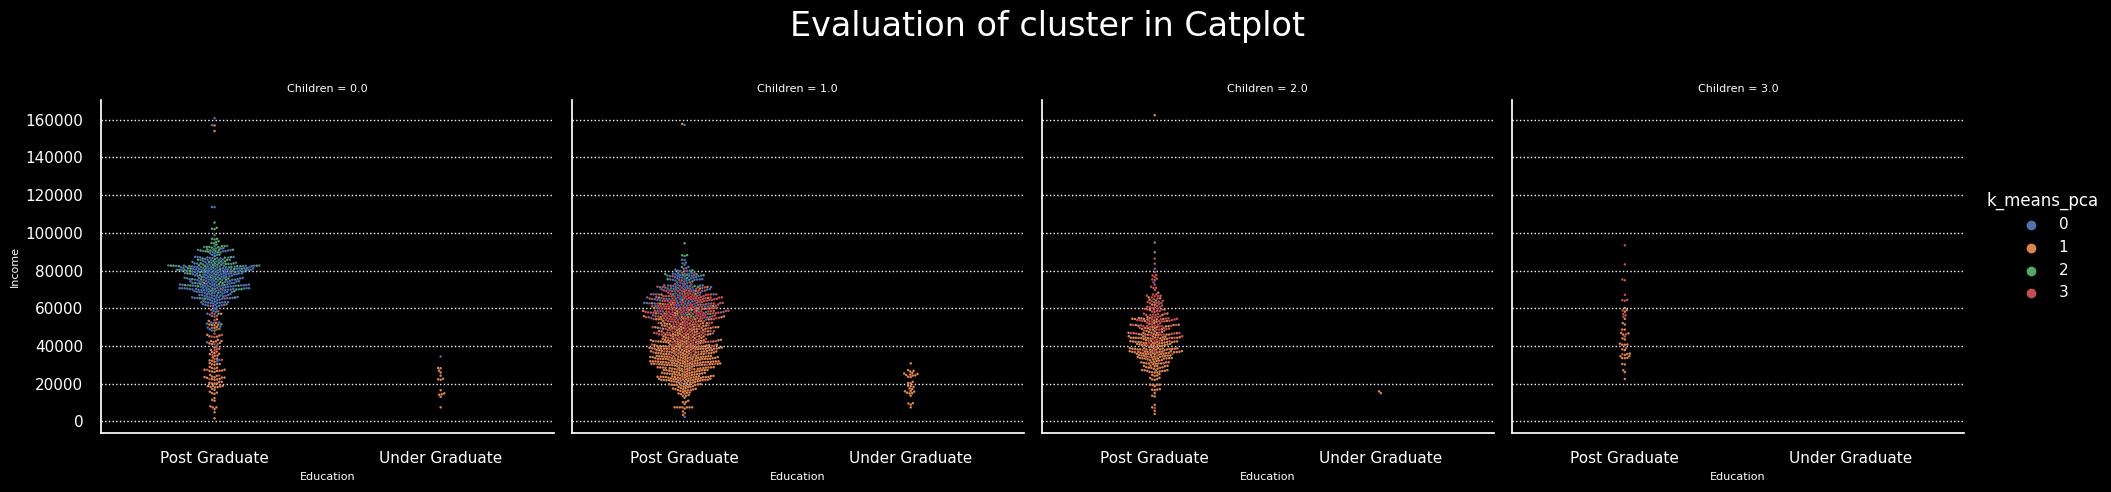

In [125]:
g = sns.catplot(
    data=df_campaign_imputeknn, kind="swarm",
    x="Education", y="Income",
    hue='k_means_pca',
    col="Children",
    s=3.2, 
    palette="deep", 
)


g.set_xticklabels(["Post Graduate", "Under Graduate"])
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle(f"Evaluation of cluster in Catplot",
                  fontsize=24, fontdict={"weight": "bold"})


plt.show(g)

><div style="background-color: #F6FFF6;"> 
><div style="font-weight: bold;font-size:18px">Overall conclusion</div>
><ul style="font-size:16px;">
>
>At the end of our EDA and clustering, we obtained:
<br>- Presence of 4 clusters.
<br>- The higher the income, the higher the expense.
<br>- Notion of buyer segments by combination of variables such as Children, Education, Income, Status_Marital.
<br>- Correlation of dataset variables.
></ul>
></div>

---

<p>
  Enlace to <a
    href="https://github.com/AAZG/Clustering-of-Customer-Personality-Analysis"
    title="Fork to repository"
    >project's GitHub repository</a
  >.
</p>

---
*Contact:*
---

<a href="https://www.linkedin.com/in/aazg"><img align=centerright src="https://cdn-icons-png.flaticon.com/512/3992/3992606.png"  width="55" height="55" target="_blank" alt="Go to my Linkedin profile" title="Go to my Linkedin profile"></a>

<a href="https://github.com/AAZG"><img align=centerright src="https://cdn-icons-png.flaticon.com/512/5968/5968846.png"  width="55" height="55" target="_blank" alt="Go to my Github profile" title="Go to my Github profile"></a>

<a href="https://www.kaggle.com/alfonsozapata"><img align=centerright src="https://cdn-icons-png.flaticon.com/512/3665/3665933.png"  width="55" height="55" target="_blank" alt="Go to my Kaggle profile" title="Go to my Kaggle profile"></a>

<a href="https://deepnote.com/@aazg"><img align=centerright src="https://cdn-icons-png.flaticon.com/512/3665/3665927.png"  width="55" height="55" target="_blank" alt="Go to my Deepnote profile" title="Go to my Deepnote profile"></a>

<a href="https://aazg.github.io/#my-work"><img align=centerright src="https://cdn-icons-png.flaticon.com/512/351/351456.png"  width="55" height="55" target="_blank" alt="View my portfolio in my Web page" title="View my portfolio in my Web page"></a>

<a href="https://api.whatsapp.com/send?phone=584128869169&text=Hi,%20i%27m%20insterested%20on%20your%20services"><img align=centerright src="https://cdn-icons-png.flaticon.com/512/4423/4423697.png"  width="55" height="55" target="_blank" alt="Start a Whatsapp conversation with me" title="Start a Whatsapp conversation with me"></a>

<a href="mailto:aazg24@gmail.com"><img align=centerright src="https://cdn-icons-png.flaticon.com/512/5968/5968534.png"  width="55" height="55" target="_blank" alt="Start a Mail conversation with me" title="Start a Mail conversation with me"></a>
    
<a href="https://twitter.com/AlfonsoZapata21"><img align=centerright src="https://cdn-icons-png.flaticon.com/512/1384/1384065.png"  width="55" height="55" target="_blank" alt="Go to my Twitter profile" title="Go to my Twitter profile"></a>

<a href="https://www.instagram.com/alfonsoandreszapataguzman/"><img align=centerright src="https://cdn-icons-png.flaticon.com/512/1409/1409946.png"  width="55" height="55" target="_blank" alt="Go to my Instagram profile" title="Go to my Instagram profile"></a>




*Let’s change the world, Together!*

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=476ba5e6-eb90-4a9a-8755-c06626d1ab4d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>